<a href="https://www.kaggle.com/code/emrekaany/promotion-bump?scriptVersionId=281126932" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/assignment4-1b/assignment4.1b.csv
/kaggle/input/assignment4-1-c/assignment4.1c.csv
/kaggle/input/assignment4-1a-csv/assignment4.1a.csv
/kaggle/input/promotiondates/PromotionDates.csv


## 📌 Dataset Description

### **Assignment4.1a.csv**
This dataset contains **daily sales records** for a set of items across multiple stores.  
- Each row represents a **sale or return** (negative quantities = returns).  
- If a store–item combination has **no record for a given day**, assume **zero sales** for that day.

### **PromotionDates.csv**
Contains the **start and end dates** for **six promotions** that took place in **2015**.

---

## 🎯 Objective

Your goal is to **model the effect of promotions** on product and store performance.

For this stage:

- Use only **Assignment4.1a.csv**  
- Consider only the **first four promotions**

---

## 🔍 Step 1 — Cluster Products into 3 Groups

Use **average weekly sales per store during non-promotion periods** to group products into:

- **Fast Items**: High average weekly sales  
- **Medium Items**: Mid-level average weekly sales  
- **Slow Items**: Low average weekly sales  

> You may choose any reasonable method (quantiles, K-means on averages, custom thresholds, etc.)

---

## 🔍 Step 2 — Cluster Stores into 3 Groups

Apply the same logic to classify stores into:

- **Fast Stores**  
- **Medium Stores**  
- **Slow Stores**

---




## 4.1a

# EDA

In [2]:
import pandas as pd
import numpy as np

# -------------------------------------------------------------------
# 1. Read data
# -------------------------------------------------------------------
a_path = "/kaggle/input/assignment4-1a-csv/assignment4.1a.csv"
promo_path = "/kaggle/input/promotiondates/PromotionDates.csv"

df_a = pd.read_csv(a_path)
df_promo = pd.read_csv(promo_path)

In [3]:
# Ensure consistent dtypes
df_a['Date'] = pd.to_datetime(df_a['Date'])

# Strip whitespace from Period names and parse dates
df_promo=df_promo.head(4)
df_promo['Period'] = df_promo['Period'].str.strip()
df_promo['StartDate'] = pd.to_datetime(df_promo['StartDate'])
df_promo['EndDate'] = pd.to_datetime(df_promo['EndDate'])

In [4]:
df_promo

,Period,StartDate,EndDate
0,Promo1,2015-02-10,2015-02-17
1,Promo2,2015-03-15,2015-03-22
2,Promo3,2015-05-24,2015-06-01
3,Promo4,2015-06-21,2015-06-28


In [5]:
# --- PROMO DOSYASINI TEMİZLE ---
df_promo['StartDate'] = pd.to_datetime(df_promo['StartDate'])
df_promo['EndDate'] = pd.to_datetime(df_promo['EndDate'])
df_promo['Period'] = df_promo['Period'].str.strip()

# --- ANA DATA ---
df_a['Date'] = pd.to_datetime(df_a['Date'])

# --- YENİ KOLONLAR ---
df_a['IsPromotion'] = 0
df_a['PromoName'] = None

# --- PROMO1 ---
p1_start = df_promo.loc[df_promo['Period']=='Promo1','StartDate'].values[0]
p1_end   = df_promo.loc[df_promo['Period']=='Promo1','EndDate'].values[0]

mask1 = (df_a['Date'] >= p1_start) & (df_a['Date'] <= p1_end)
df_a.loc[mask1, 'IsPromotion'] = 1
df_a.loc[mask1, 'PromoName']   = 'Promo1'

# --- PROMO2 ---
p2_start = df_promo.loc[df_promo['Period']=='Promo2','StartDate'].values[0]
p2_end   = df_promo.loc[df_promo['Period']=='Promo2','EndDate'].values[0]

mask2 = (df_a['Date'] >= p2_start) & (df_a['Date'] <= p2_end)
df_a.loc[mask2, 'IsPromotion'] = 1
df_a.loc[mask2, 'PromoName']   = 'Promo2'

# --- PROMO3 ---
p3_start = df_promo.loc[df_promo['Period']=='Promo3','StartDate'].values[0]
p3_end   = df_promo.loc[df_promo['Period']=='Promo3','EndDate'].values[0]

mask3 = (df_a['Date'] >= p3_start) & (df_a['Date'] <= p3_end)
df_a.loc[mask3, 'IsPromotion'] = 1
df_a.loc[mask3, 'PromoName']   = 'Promo3'

# --- PROMO4 ---
p4_start = df_promo.loc[df_promo['Period']=='Promo4','StartDate'].values[0]
p4_end   = df_promo.loc[df_promo['Period']=='Promo4','EndDate'].values[0]

mask4 = (df_a['Date'] >= p4_start) & (df_a['Date'] <= p4_end)
df_a.loc[mask4, 'IsPromotion'] = 1
df_a.loc[mask4, 'PromoName']   = 'Promo4'


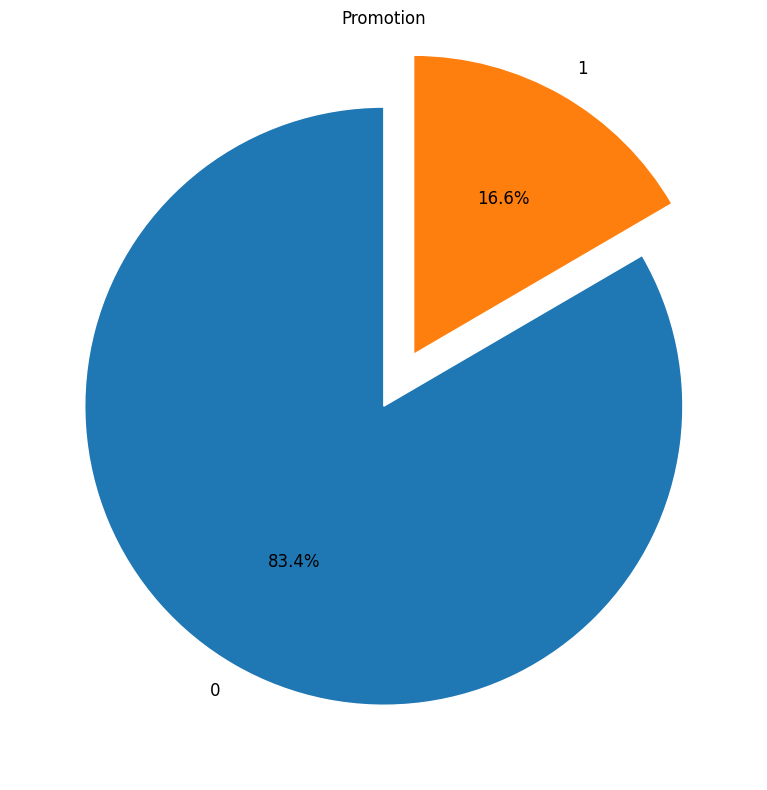

In [6]:
import matplotlib.pyplot as plt

# Plot setup
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Pie chart — Promotion
df_a["IsPromotion"].value_counts().plot.pie(
    explode=[0, 0.2],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    textprops={"fontsize": 12},
    ax=ax,
)

ax.set_title("Promotion")
ax.set_ylabel("")

plt.tight_layout()
plt.show()


In [7]:
df=df_a #full df definition
df_a=df_a[df_a['IsPromotion']==0]

In [8]:
df_a

,Date,StoreCode,ProductCode,SalesQuantity,IsPromotion,PromoName
0,2015-01-01,8,9,-1,0,None
1,2015-01-01,131,9,1,0,None
2,2015-01-01,144,9,2,0,None
3,2015-01-01,203,9,2,0,None
4,2015-01-01,256,9,0,0,None
...,...,...,...,...,...,...
1873613,2015-07-30,292,315,0,0,None
1873614,2015-07-31,12,315,1,0,None
1873615,2015-07-31,104,315,1,0,None
1873616,2015-07-31,261,315,1,0,None


In [9]:
never_sold_positive = (
    df_a
    .groupby(["ProductCode", "StoreCode"])["SalesQuantity"]
    .apply(lambda x: (x > 0).sum())   # pozitif satış adedini say
)

# hiç pozitif satış olmamış olanlar
never_sold_positive = never_sold_positive[never_sold_positive == 0]

never_sold_positive


ProductCode  StoreCode
1            19           0
             29           0
             88           0
             119          0
             133          0
                         ..
317          299          0
             300          0
             305          0
             309          0
             321          0
Name: SalesQuantity, Length: 6013, dtype: int64

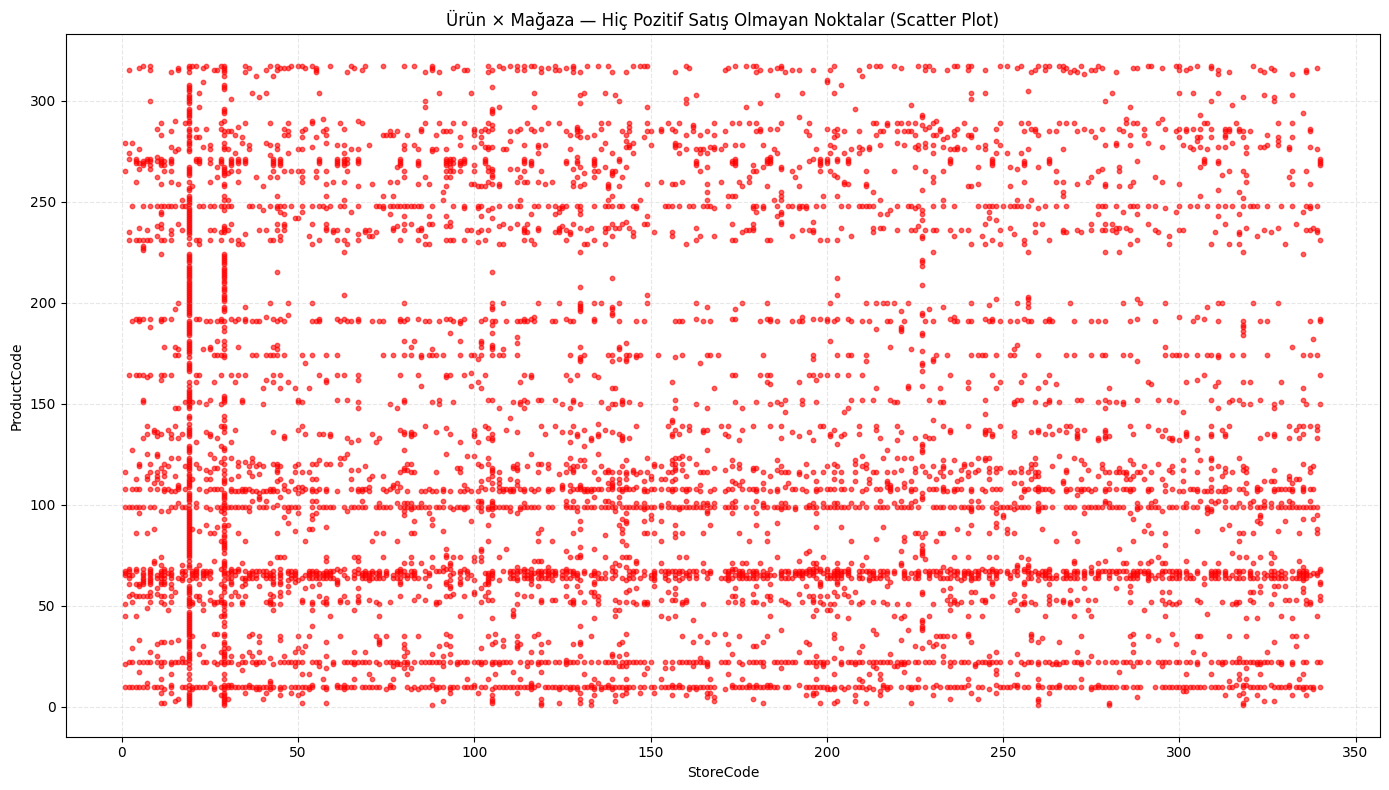

In [10]:
never_df = never_sold_positive.reset_index()
never_df = never_df[['ProductCode','StoreCode']]

plt.figure(figsize=(14, 8))
plt.scatter(
    never_df['StoreCode'],
    never_df['ProductCode'],
    s=10, color="red", alpha=0.6
)
plt.title("Ürün × Mağaza — Hiç Pozitif Satış Olmayan Noktalar (Scatter Plot)")
plt.xlabel("StoreCode")
plt.ylabel("ProductCode")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


Some products haven't been sold in some stores. Probably those products don't exist those stores. That should not effect our fast-slow derivations because they will cause 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


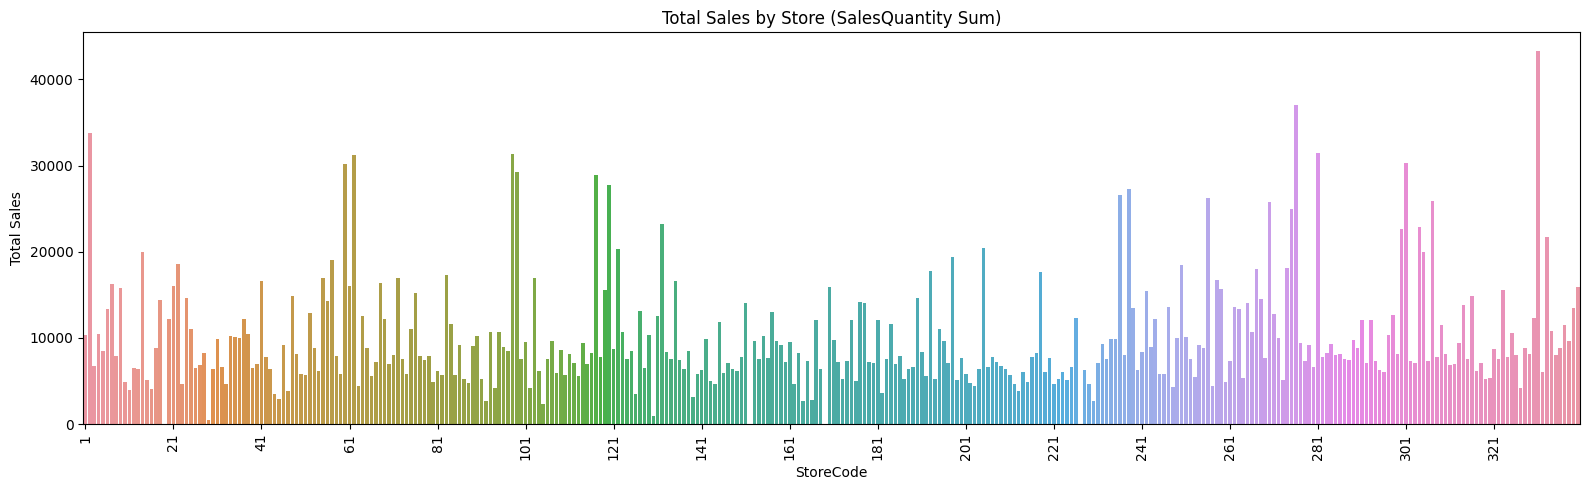

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# total sales by store (includes negative returns or not? -> You did not filter)
store_sales = (
    df_a
        .groupby("StoreCode")["SalesQuantity"]
        .sum()
        .sort_index()        # correct sorting by StoreCode
)

# convert index to list so tick positions align with int positions
store_codes = store_sales.index.tolist()

plt.figure(figsize=(16,5))
sns.barplot(x=store_codes, y=store_sales.values)

plt.title("Total Sales by Store (SalesQuantity Sum)")
plt.xlabel("StoreCode")
plt.ylabel("Total Sales")

# show every 20th label
plt.xticks(
    ticks=range(0, len(store_codes), 20),
    labels=[store_codes[i] for i in range(0, len(store_codes), 20)],
    rotation=90
)

plt.tight_layout()
plt.show()


When we analyze stores total sales, we see that some stores have more average sales than the others. 

After my findings, I decide to calculate slow,medium and fast items by considering following calculations:
- we measure performance of items store by store. Then, we can get the average. Because some stores are more capable of selling compared to the other ones. We can calculate success ratio for the store: Amount of the item sold in the store / Total amount of items sold in the store. Then, we can get the average.
- Some products have zero sales in some stores. We can exclude them while getting average for accurate measurements

# 4.1a

In [12]:
import pandas as pd
import numpy as np

# 1) Store toplam satışları
store_totals = (
    df_a.groupby("StoreCode")["SalesQuantity"]
        .sum()
        .rename("store_total")
)

# 2) Product–Store toplam satışları
prod_store_sales = (
    df_a.groupby(["ProductCode", "StoreCode"])["SalesQuantity"]
        .sum()
        .rename("product_store_total")
        .reset_index()
)

# 3) Product–Store oran = product_store_total / store_total
prod_store_sales = prod_store_sales.merge(store_totals, on="StoreCode", how="left")
prod_store_sales["ratio"] = prod_store_sales["product_store_total"] / prod_store_sales["store_total"]

# 4) Pivot formatına getir (kolonlar: store1 store2 ... )
pivot_ratio = prod_store_sales.pivot(
    index="ProductCode",
    columns="StoreCode",
    values="ratio"
)

# 5) never_sold_positive olan product–store çiftlerini NaN yap
for (p, s), _ in never_sold_positive.items():
    if (p in pivot_ratio.index) and (s in pivot_ratio.columns):
        pivot_ratio.loc[p, s] = np.nan

# 6) Avg kolonu ekle (sadece NaN olmayanların ortalaması)
pivot_ratio["avg"] = pivot_ratio.mean(axis=1, skipna=True)



# AVG'ye göre 3 kuartay / tercil (slow, medium, fast)

# NaN olmayan avg değerlerinden eşik hesapla
q1, q2 = pivot_ratio["avg"].quantile([1/3, 2/3])

def classify_speed(x):
    if pd.isna(x):
        return np.nan   # istersen "Unknown" da yapabilirsin
    if x <= q1:
        return "Slow"
    elif x <= q2:
        return "Medium"
    else:
        return "Fast"

pivot_ratio["speed_segment"] = pivot_ratio["avg"].apply(classify_speed)

pivot_ratio.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

StoreCode,1,2,3,4,5,6,7,8,9,10,...,333,334,335,336,337,338,339,340,avg,speed_segment
ProductCode,,,,,,,,,,,,,,,,,,,,,
1,0.001928,0.001155,0.005455,0.001147,0.002115,0.001273,0.002453,0.002514,0.000317,0.003287,...,0.000552,0.009361,0.001865,NaN,0.004451,0.001038,0.013523,0.002320,0.002778,Fast
2,0.001446,0.002665,0.002654,0.000956,0.002468,0.002470,0.000736,0.002640,0.000634,0.000616,...,0.000737,0.001297,0.004103,NaN,0.000349,0.004879,0.010105,0.002383,0.002178,Medium
3,0.002795,0.001777,0.000737,0.000956,0.000353,0.002695,0.003189,0.003772,0.000254,0.001233,...,0.001105,0.002224,0.001741,0.004074,0.000786,0.001557,0.006018,0.000439,0.001611,Medium
4,0.001253,0.002043,0.001769,0.001817,0.002821,0.002695,0.001104,0.001383,0.000444,0.000616,...,0.001105,0.003058,0.000746,NaN,0.001571,0.001869,0.006761,0.000753,0.001839,Medium
5,0.001060,0.001510,0.006487,0.000574,0.001175,0.002096,0.001104,0.000880,0.002028,0.001027,...,0.003867,0.000834,0.000870,0.005093,0.002444,0.008616,0.006093,0.004076,0.002072,Medium


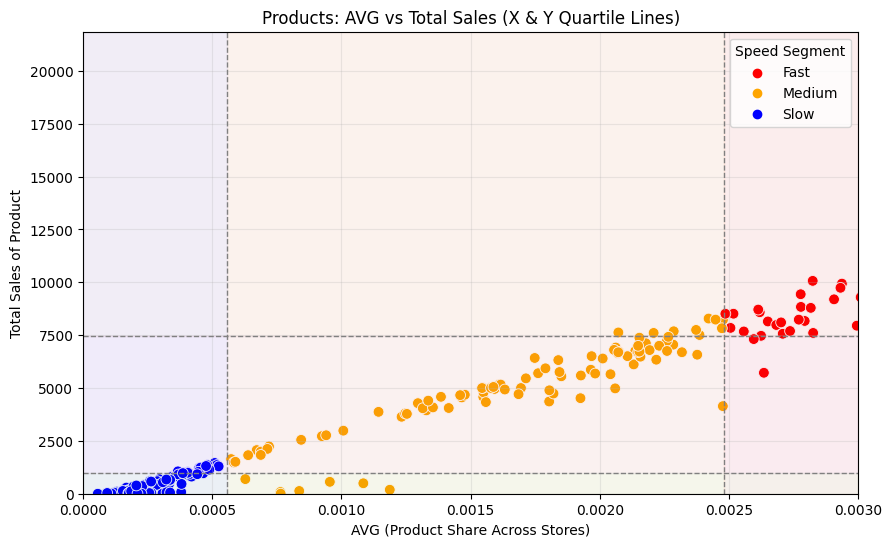

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Product total satışları
product_totals = (
    df_a.groupby("ProductCode")["SalesQuantity"]
        .sum()
        .rename("total_sales")
)

# pivot_ratio ile birleştir
plot_df = pivot_ratio[["avg", "speed_segment"]].copy()
plot_df = plot_df.merge(product_totals, left_index=True, right_index=True, how="left")

# Zoom limitleri
low_limit = plot_df["total_sales"].quantile(0.90)

# X (avg) tercilleri
q1_x, q2_x = plot_df["avg"].quantile([1/3, 2/3])

# Y (total_sales) tercilleri
q1_y, q2_y = plot_df["total_sales"].quantile([1/3, 2/3])

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    data=plot_df,
    x="avg",
    y="total_sales",
    hue="speed_segment",
    palette={"Slow": "blue", "Medium": "orange", "Fast": "red"},
    s=60
)

# Zoom
ax.set_xlim(0, 0.003)
ax.set_ylim(0, low_limit)

# --------------------------
# Alan boyama (X ekseni)
# --------------------------
ax.axvspan(0, q1_x, color="blue", alpha=0.04)
ax.axvspan(q1_x, q2_x, color="orange", alpha=0.04)
ax.axvspan(q2_x, 0.003, color="red", alpha=0.04)

# --------------------------
# Alan boyama (Y ekseni)
# --------------------------
ax.axhspan(0, q1_y, color="green", alpha=0.04)
ax.axhspan(q1_y, q2_y, color="purple", alpha=0.04)
ax.axhspan(q2_y, low_limit, color="brown", alpha=0.04)

# --------------------------
# Quartile çizgileri
# --------------------------
# X için
ax.axvline(q1_x, color="grey", linestyle="--", linewidth=1)
ax.axvline(q2_x, color="grey", linestyle="--", linewidth=1)

# Y için
ax.axhline(q1_y, color="grey", linestyle="--", linewidth=1)
ax.axhline(q2_y, color="grey", linestyle="--", linewidth=1)

plt.title("Products: AVG vs Total Sales (X & Y Quartile Lines)")
plt.xlabel("AVG (Product Share Across Stores)")
plt.ylabel("Total Sales of Product")
plt.legend(title="Speed Segment")
plt.grid(alpha=0.25)

plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


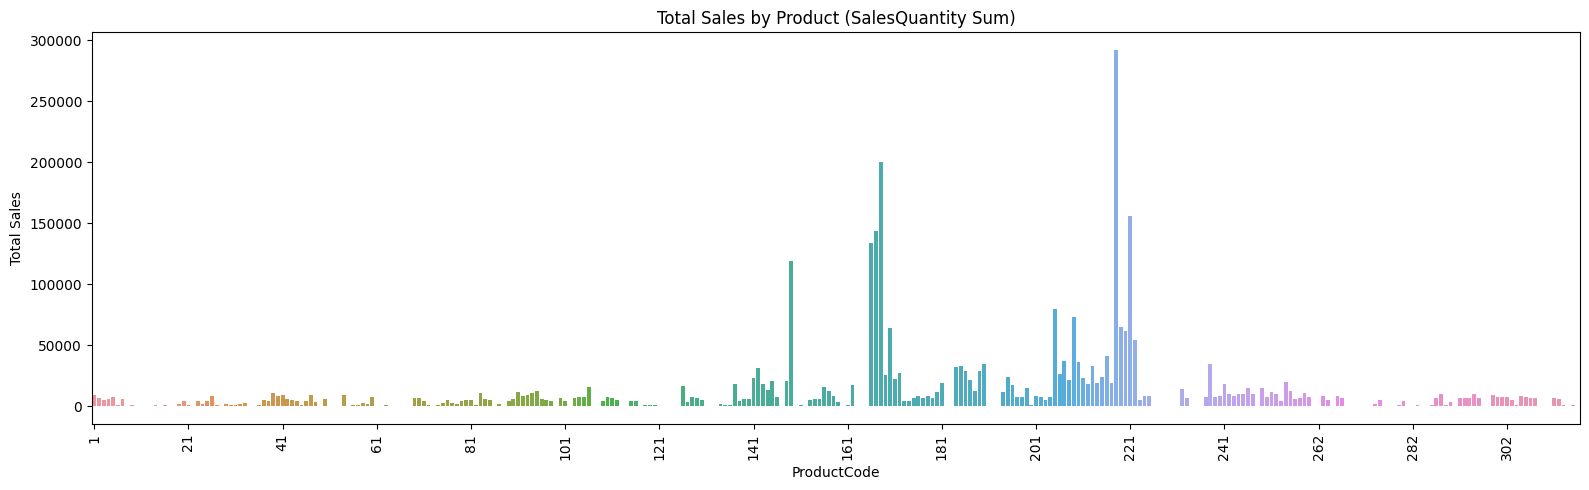

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# total sales by product
product_sales = (
    df_a
        .groupby("ProductCode")["SalesQuantity"]
        .sum()
        .sort_index()       # ProductCode’a göre ascending sıralama
)

# convert index to list for tick alignment
product_codes = product_sales.index.tolist()

plt.figure(figsize=(16,5))
sns.barplot(x=product_codes, y=product_sales.values)

plt.title("Total Sales by Product (SalesQuantity Sum)")
plt.xlabel("ProductCode")
plt.ylabel("Total Sales")

# show every 20th label
plt.xticks(
    ticks=range(0, len(product_codes), 20),
    labels=[product_codes[i] for i in range(0, len(product_codes), 20)],
    rotation=90
)

plt.tight_layout()
plt.show()


We see the same effect for the products. So, we do the same calculation for stores.

In [15]:
import pandas as pd
import numpy as np

# 1) Total sales per Product
product_totals = (
    df_a.groupby("ProductCode")["SalesQuantity"]
        .sum()
        .rename("product_total")
)

# 2) Total sales per Store
store_totals = (
    df_a.groupby("StoreCode")["SalesQuantity"]
        .sum()
        .rename("store_total")
)

# 3) Store–Product total matrix
store_product_sales = (
    df_a.groupby(["StoreCode", "ProductCode"])["SalesQuantity"]
        .sum()
        .rename("store_product_total")
        .reset_index()
)

# 4) Merge store totals → get ratio = store_product_total / store_total
store_product_sales = store_product_sales.merge(store_totals, on="StoreCode", how="left")
store_product_sales["ratio"] = store_product_sales["store_product_total"] / store_product_sales["store_total"]

# 5) Pivot → rows = Store, columns = Product
pivot_store = store_product_sales.pivot(
    index="StoreCode",
    columns="ProductCode",
    values="ratio"
)


In [16]:
pivot_store

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


ProductCode,1,2,3,4,5,6,7,8,9,10,...,308,309,310,311,312,313,314,315,316,317
StoreCode,,,,,,,,,,,,,,,,,,,,,
1,0.001928,0.001446,0.002795,0.001253,0.001060,0.002410,0.000964,NaN,0.000096,0.0,...,0.002217,NaN,NaN,NaN,0.000289,0.001735,0.000289,0.000193,NaN,0.000289
2,0.001155,0.002665,0.001777,0.002043,0.001510,0.000385,0.003998,NaN,0.000296,0.0,...,0.002103,NaN,NaN,NaN,0.000622,0.009862,0.000148,0.000000,0.000296,0.000030
3,0.005455,0.002654,0.000737,0.001769,0.006487,0.002506,NaN,NaN,0.000295,0.0,...,0.003833,NaN,NaN,NaN,0.003686,NaN,NaN,0.000147,0.000147,0.000147
4,0.001147,0.000956,0.000956,0.001817,0.000574,NaN,0.001147,NaN,NaN,0.0,...,0.002390,NaN,NaN,NaN,0.001625,0.001434,0.000287,0.001052,NaN,0.000478
5,0.002115,0.002468,0.000353,0.002821,0.001175,0.000705,0.000588,NaN,0.000235,0.0,...,0.001528,NaN,NaN,NaN,0.014808,0.003996,0.000353,NaN,0.000000,0.000118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,0.004074,NaN,0.005093,0.000000,0.007809,NaN,0.000113,0.0,...,0.002377,NaN,NaN,0.000226,NaN,NaN,0.000000,0.000000,0.000113,NaN
337,0.004451,0.000349,0.000786,0.001571,0.002444,0.000436,0.000698,NaN,0.000087,0.0,...,0.002531,NaN,NaN,NaN,0.000436,NaN,0.000175,0.000087,0.000611,0.000087
338,0.001038,0.004879,0.001557,0.001869,0.008616,0.000727,0.020451,NaN,0.000000,0.0,...,0.002491,NaN,NaN,NaN,0.000623,NaN,0.000208,0.000208,NaN,0.000311


In [17]:
for (prod, store), _ in never_sold_positive.items():
    if store in pivot_store.index and prod in pivot_store.columns:
        pivot_store.loc[store, prod] = np.nan


In [18]:
pivot_store["avg"] = pivot_store.mean(axis=1, skipna=True)


In [19]:
q1_s, q2_s = pivot_store["avg"].quantile([1/3, 2/3])

def classify_store_segment(x):
    if pd.isna(x):
        return np.nan
    if x <= q1_s:
        return "Slow"
    elif x <= q2_s:
        return "Medium"
    else:
        return "Fast"

pivot_store["speed_segment"] = pivot_store["avg"].apply(classify_store_segment)


In [20]:
store_total_sales = store_totals.rename("total_sales")
store_df = pivot_store[["avg", "speed_segment"]].merge(
    store_total_sales,
    left_index=True,
    right_index=True,
    how="left"
)


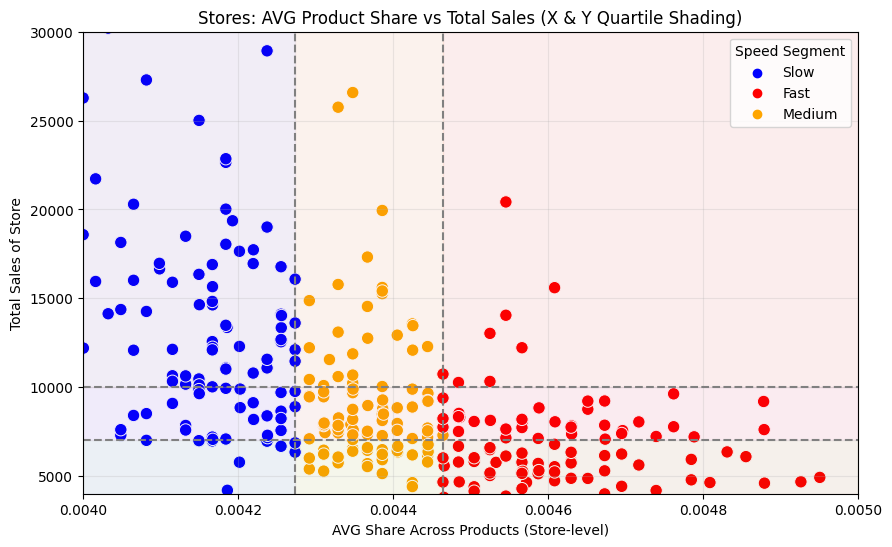

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Zoom limit for Y
low_limit_store = store_df["total_sales"].quantile(0.90)

# X (avg) tertiles
qs1, qs2 = store_df["avg"].quantile([1/3, 2/3])

# Y (total_sales) tertiles
qt1, qt2 = store_df["total_sales"].quantile([1/3, 2/3])

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    data=store_df,
    x="avg",
    y="total_sales",
    hue="speed_segment",
    palette={"Slow": "blue", "Medium": "orange", "Fast": "red"},
    s=80
)

# Zoom
ax.set_xlim(0.004,0.005)   # auto-zoom X
ax.set_ylim(4000, 30000)                 # zoom Y

# -----------------------------------------
# X shading
# -----------------------------------------
ax.axvspan(0, qs1, color="blue", alpha=0.04)
ax.axvspan(qs1, qs2, color="orange", alpha=0.04)
ax.axvspan(qs2, ax.get_xlim()[1], color="red", alpha=0.04)

# X quartile lines
ax.axvline(qs1, color="grey", linestyle="--")
ax.axvline(qs2, color="grey", linestyle="--")

# -----------------------------------------
# Y shading
# -----------------------------------------
ax.axhspan(0, qt1, color="green", alpha=0.04)
ax.axhspan(qt1, qt2, color="purple", alpha=0.04)
ax.axhspan(qt2, ax.get_ylim()[1], color="brown", alpha=0.04)

# Y quartile lines
ax.axhline(qt1, color="grey", linestyle="--")
ax.axhline(qt2, color="grey", linestyle="--")

plt.title("Stores: AVG Product Share vs Total Sales (X & Y Quartile Shading)")
plt.xlabel("AVG Share Across Products (Store-level)")
plt.ylabel("Total Sales of Store")
plt.grid(alpha=0.25)
plt.legend(title="Speed Segment")

plt.show()


In [22]:
df_a.columns

Index(['Date', 'StoreCode', 'ProductCode', 'SalesQuantity', 'IsPromotion',
       'PromoName'],
      dtype='object')

In [23]:
df.columns

Index(['Date', 'StoreCode', 'ProductCode', 'SalesQuantity', 'IsPromotion',
       'PromoName'],
      dtype='object')

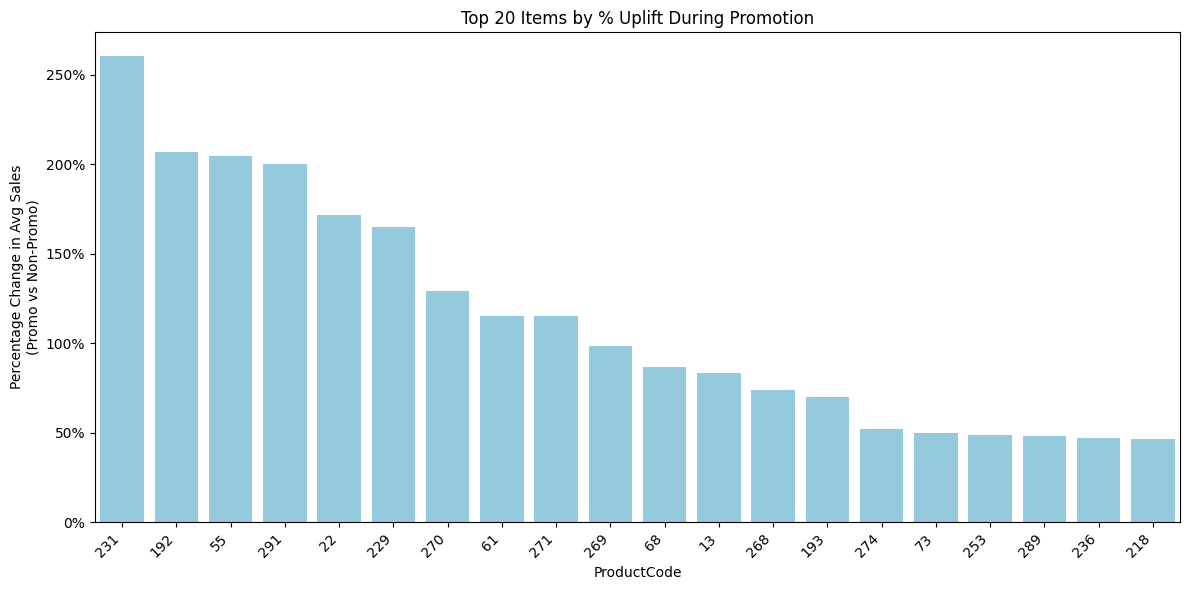

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# 1) ProductCode & IsPromotion bazında ortalama satış
item_promo_avg = (
    df
    .groupby(["ProductCode", "IsPromotion"])["SalesQuantity"]
    .mean()
    .unstack()                 # kolonlar: 0, 1
)

# 2) Kolonları anlamlı isimlendir
item_promo_avg = item_promo_avg.rename(
    columns={0: "avg_nonpromo", 1: "avg_promo"}
)

# Sadece her iki durumda da gözlemi olan ve non-promo ortalaması > 0 olan ürünler
item_promo_avg = item_promo_avg.dropna(subset=["avg_nonpromo", "avg_promo"])
item_promo_avg = item_promo_avg[item_promo_avg["avg_nonpromo"] > 0]

# 3) Fark ve yüzde değişim
item_promo_avg["abs_diff"] = (
    item_promo_avg["avg_promo"] - item_promo_avg["avg_nonpromo"]
)
item_promo_avg["pct_change"] = (
    item_promo_avg["abs_diff"] / item_promo_avg["avg_nonpromo"]
)

# 4) % change'e göre en yüksekten en düşüğe sırala ve Top 20'yi al
top20 = (
    item_promo_avg
    .sort_values("pct_change", ascending=False)
    .head(20)
    .reset_index()   # ProductCode kolonu için
)

# 5) Grafik – Top 20 item, % değişime göre sıralı
plt.figure(figsize=(12, 6))

# x eksenini zaten sıralı olacak şekilde verelim
order = top20.sort_values("pct_change", ascending=False)["ProductCode"]

sns.barplot(
    data=top20,
    x="ProductCode",
    y="pct_change",
    order=order,
    color="skyblue"
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("ProductCode")
plt.ylabel("Percentage Change in Avg Sales\n(Promo vs Non-Promo)")
plt.title("Top 20 Items by % Uplift During Promotion")

# Y eksenini % formatına çevir
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.show()


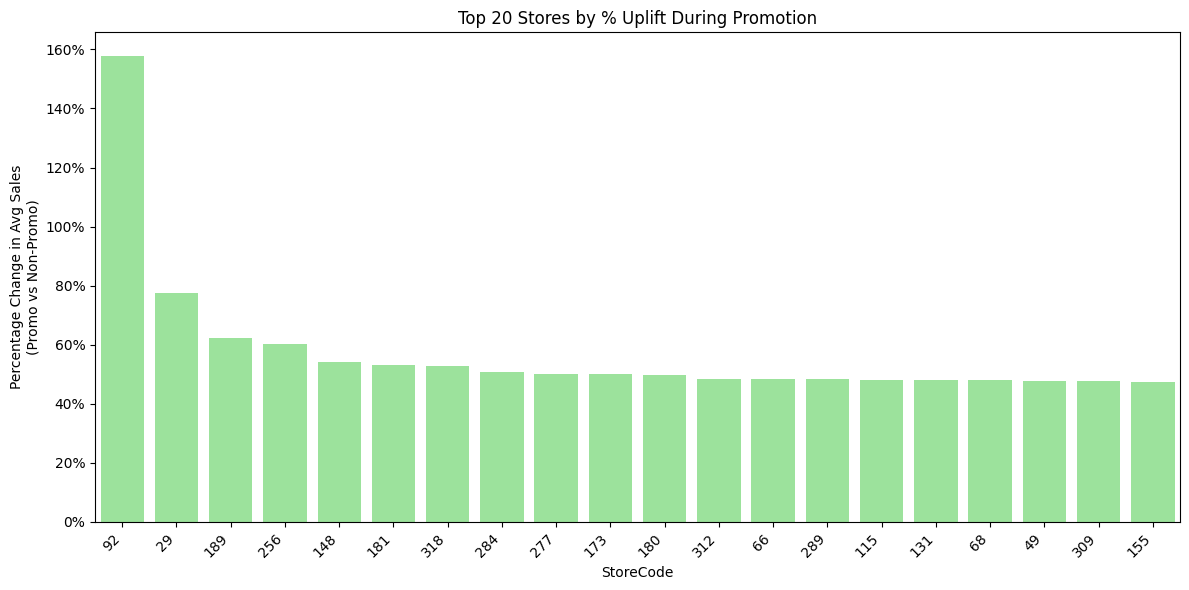

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# 1) Store & IsPromotion bazında ortalama satış
store_promo_avg = (
    df
    .groupby(["StoreCode", "IsPromotion"])["SalesQuantity"]
    .mean()
    .unstack()                 # kolonlar: 0, 1
)

# 2) Kolonları isimlendir
store_promo_avg = store_promo_avg.rename(
    columns={0: "avg_nonpromo", 1: "avg_promo"}
)

# Non-promo ortalaması sıfır olan veya NaN olan store'ları çıkar
store_promo_avg = store_promo_avg.dropna(subset=["avg_nonpromo", "avg_promo"])
store_promo_avg = store_promo_avg[store_promo_avg["avg_nonpromo"] > 0]

# 3) Mutlak ve yüzde fark hesapları
store_promo_avg["abs_diff"] = (
    store_promo_avg["avg_promo"] - store_promo_avg["avg_nonpromo"]
)
store_promo_avg["pct_change"] = (
    store_promo_avg["abs_diff"] / store_promo_avg["avg_nonpromo"]
)

# 4) % değişime göre sıralama ve Top 20 alma
top20_store = (
    store_promo_avg
    .sort_values("pct_change", ascending=False)
    .head(20)
    .reset_index()   # StoreCode için
)

# 5) Grafik
plt.figure(figsize=(12, 6))

order = top20_store.sort_values("pct_change", ascending=False)["StoreCode"]

sns.barplot(
    data=top20_store,
    x="StoreCode",
    y="pct_change",
    order=order,
    color="lightgreen"
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("StoreCode")
plt.ylabel("Percentage Change in Avg Sales\n(Promo vs Non-Promo)")
plt.title("Top 20 Stores by % Uplift During Promotion")

# Y eksenini % formatına çevir
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
import numpy as np

# 1) Product bazlı speed_segment bilgisini al
item_speed = pivot_ratio[["speed_segment"]].reset_index()  # ProductCode + speed_segment

# 2) Ana df ile left join
dfy = df.merge(item_speed, on="ProductCode", how="left")

# Sadece segmenti belli olanları al (Slow/Medium/Fast)
dfy = dfy[~dfy["speed_segment"].isna()].copy()

# 3) Segment & Promo bazında TOPLAM satış (mean değil!)
seg_promo_totals = (
    dfy
    .groupby(["speed_segment", "IsPromotion"])["SalesQuantity"]
    .mean()
    .reset_index()
)

# 4) Pivot: kolonlar promo=0 ve promo=1 toplamları olacak
seg_promo_totals = seg_promo_totals.pivot(
    index="speed_segment",
    columns="IsPromotion",
    values="SalesQuantity"
)

# Eksik kolonları garanti et (her segmentte hem 0 hem 1 olmayabilir)
if 0 not in seg_promo_totals.columns:
    seg_promo_totals[0] = np.nan
if 1 not in seg_promo_totals.columns:
    seg_promo_totals[1] = np.nan

# 5) Anlamlı isimler ver
seg_promo_totals = seg_promo_totals.rename(columns={
    0: "mean_nonpromo",
    1: "mean_promo"
})

# 6) Fark ve % change
seg_promo_totals["abs_diff"] = (
    seg_promo_totals["mean_promo"] - seg_promo_totals["mean_nonpromo"]
)
seg_promo_totals["pct_change"] = (
    seg_promo_totals["abs_diff"] / seg_promo_totals["mean_nonpromo"]
)

seg_promo_totals


IsPromotion,mean_nonpromo,mean_promo,abs_diff,pct_change
speed_segment,,,,
Fast,2.979570,3.622073,0.642502,0.215636
Medium,0.989290,1.075678,0.086388,0.087323
Slow,0.436164,0.487354,0.051190,0.117365


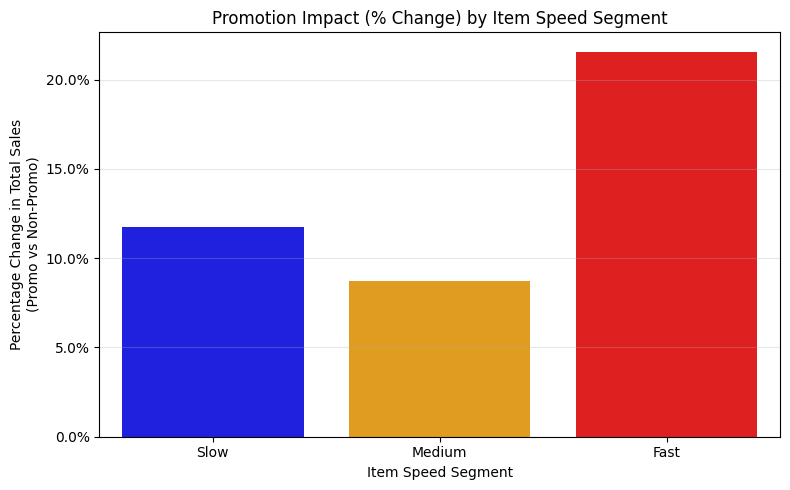

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Segment bazında % change tablon (seg_promo_totals) hazır görünüyor,
# ama güvenli olması için reset_index yapıyoruz:

plot_seg = seg_promo_totals.reset_index()   # speed_segment kolonu gelsin

# Segment sırası net olsun
order = ["Slow", "Medium", "Fast"]

plt.figure(figsize=(8, 5))

sns.barplot(
    data=plot_seg,
    x="speed_segment",
    y="pct_change",
    order=order,
    palette={"Slow": "blue", "Medium": "orange", "Fast": "red"}
)

plt.title("Promotion Impact (% Change) by Item Speed Segment")
plt.xlabel("Item Speed Segment")
plt.ylabel("Percentage Change in Total Sales\n(Promo vs Non-Promo)")

# Y eksenini % formatına dönüştür
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


In [28]:
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd

# -------------------------------
# 1) Product bazında promo uplift
# -------------------------------
item_uplift = (
    df
    .groupby(["ProductCode", "IsPromotion"])["SalesQuantity"]
    .mean()
    .unstack()
    .rename(columns={0: "avg_nonpromo", 1: "avg_promo"})
)

# veri eksik olanları at
item_uplift = item_uplift.dropna()

item_uplift["uplift"] = (
    item_uplift["avg_promo"] - item_uplift["avg_nonpromo"]
)

# -------------------------------
# 2) speed segment merge
# -------------------------------
item_speed_map = pivot_ratio[["speed_segment"]].reset_index()

item_uplift = item_uplift.reset_index().merge(
    item_speed_map,
    on="ProductCode",
    how="left"
)

# sadece slow/fast
fast_items = item_uplift[item_uplift["speed_segment"] == "Fast"]["uplift"]
slow_items = item_uplift[item_uplift["speed_segment"] == "Slow"]["uplift"]

# -------------------------------
# 3) T-TEST (Welch)
# -------------------------------
t_stat, p_val = ttest_ind(fast_items, slow_items, equal_var=False)

print("=== Fast vs Slow ITEMS — 99.9% Confidence Test ===")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value:     {p_val:.6f}")

# -------------------------------
# 4) Interpretation (99.9% level)
# -------------------------------
alpha = 0.001   # %99.9 confidence

if p_val < alpha:
    print("\nConclusion (99.9% confidence):")
    print("we can say that THERE IS a statistically significant difference")
    print("between Fast and Slow items in terms of promotion uplift ")
    
    if fast_items.mean() > slow_items.mean():
        print("we can say that Fast items respond MORE to promotions than Slow items.")
    else:
        print("we can say that Slow items respond MORE to promotions than Fast items ")
else:
    print("\nConclusion (99.9% confidence):")
    print("we can say that there is NO statistically significant difference")
    print("between Fast and Slow items' promotion uplift at the 99.9% confidence level.")


=== Fast vs Slow ITEMS — 99.9% Confidence Test ===
T-statistic: 5.0239
P-value:     0.000002

Conclusion (99.9% confidence):
we can say that THERE IS a statistically significant difference
between Fast and Slow items in terms of promotion uplift 
we can say that Fast items respond MORE to promotions than Slow items.


In [29]:
import pandas as pd
import numpy as np

# 1) Store bazlı speed_segment bilgisini al
store_speed = pivot_store[["speed_segment"]].reset_index()  # StoreCode + speed_segment

# 2) Ana df ile left join
dfs = df.merge(store_speed, on="StoreCode", how="left")

# Sadece segmenti belli olanları al (Slow/Medium/Fast)
dfs = dfs[~dfs["speed_segment"].isna()].copy()

# 3) Segment & Promo bazında TOPLAM satış
store_seg_promo_totals = (
    dfs
    .groupby(["speed_segment", "IsPromotion"])["SalesQuantity"]
    .mean()               # toplam satış (istersen .mean yapabilirsin)
    .reset_index()
)

# 4) Pivot: kolonlar promo=0 ve promo=1 toplamları olacak
store_seg_promo_totals = store_seg_promo_totals.pivot(
    index="speed_segment",
    columns="IsPromotion",
    values="SalesQuantity"
)

# Eksik kolonları garanti et (her segmentte hem 0 hem 1 olmayabilir)
if 0 not in store_seg_promo_totals.columns:
    store_seg_promo_totals[0] = np.nan
if 1 not in store_seg_promo_totals.columns:
    store_seg_promo_totals[1] = np.nan

# 5) Anlamlı isimler ver
store_seg_promo_totals = store_seg_promo_totals.rename(columns={
    0: "mean_nonpromo",
    1: "mean_promo"
})

# 6) Fark ve % change
store_seg_promo_totals["abs_diff"] = (
    store_seg_promo_totals["mean_promo"] - store_seg_promo_totals["mean_nonpromo"]
)
store_seg_promo_totals["pct_change"] = (
    store_seg_promo_totals["abs_diff"] / store_seg_promo_totals["mean_nonpromo"]
)

store_seg_promo_totals


IsPromotion,mean_nonpromo,mean_promo,abs_diff,pct_change
speed_segment,,,,
Fast,1.963740,2.260952,0.297212,0.15135
Medium,2.091593,2.544004,0.452411,0.21630
Slow,2.334956,2.820511,0.485554,0.20795


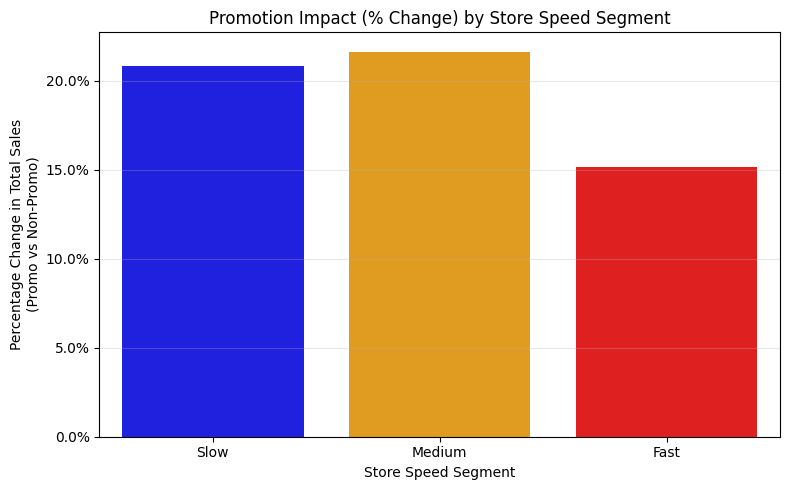

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# store_seg_promo_totals varsa direkt kullanıyoruz
plot_store_seg = store_seg_promo_totals.reset_index()

# Segment sırası sabit olsun
order = ["Slow", "Medium", "Fast"]

plt.figure(figsize=(8, 5))

sns.barplot(
    data=plot_store_seg,
    x="speed_segment",
    y="pct_change",
    order=order,
    palette={"Slow": "blue", "Medium": "orange", "Fast": "red"}
)

plt.title("Promotion Impact (% Change) by Store Speed Segment")
plt.xlabel("Store Speed Segment")
plt.ylabel("Percentage Change in Total Sales\n(Promo vs Non-Promo)")

# Y ekseni yüzde formatı
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


In [31]:
df.columns

Index(['Date', 'StoreCode', 'ProductCode', 'SalesQuantity', 'IsPromotion',
       'PromoName'],
      dtype='object')

In [32]:
from scipy.stats import ttest_ind
import numpy as np

# 1) Store bazlı uplift için average aggregation
store_uplift = (
    df
    .groupby(["StoreCode", "IsPromotion"])["SalesQuantity"]
    .mean()
    .unstack()
    .rename(columns={0: "avg_nonpromo", 1: "avg_promo"})
)

store_uplift = store_uplift.dropna()

store_uplift["uplift"] = store_uplift["avg_promo"] - store_uplift["avg_nonpromo"]

# 2) Speed segment merge (pivot_store -> StoreCode + speed_segment)
store_speed_map = pivot_store[["speed_segment"]].reset_index()

store_uplift = store_uplift.reset_index().merge(
    store_speed_map, on="StoreCode", how="left"
)

# 3) Fast vs Slow store uplift dağılımları
fast_stores = store_uplift[store_uplift["speed_segment"]=="Fast"]["uplift"]
slow_stores = store_uplift[store_uplift["speed_segment"]=="Slow"]["uplift"]

# 4) T-TEST (Welch t-test)
t_stat_s, p_val_s = ttest_ind(fast_stores, slow_stores, equal_var=False)

print("\n=== A7 — T-TEST: Fast vs Slow STORES (99.9% Confidence) ===")
print(f"T-statistic: {t_stat_s:.4f}")
print(f"P-value:     {p_val_s:.8f}")

# 5) 99.9% confidence interpretation
alpha = 0.01   # %99 confidence

print("\nInterpretation (99% Confidence):")
if p_val_s < alpha:
    print("we can say that THERE IS a statistically significant difference")
    print("between Fast and Slow stores in terms of promotion uplift (99% confidence).")

    if fast_stores.mean() > slow_stores.mean():
        print("we can say that Fast stores respond MORE to promotions than Slow stores.")
    else:
        print("we can say that Slow stores respond MORE to promotions than Fast stores.")
else:
    print("we can say that there is NO statistically significant difference")
    print("between Fast and Slow store promotion uplift at the 99% confidence level.")



=== A7 — T-TEST: Fast vs Slow STORES (99.9% Confidence) ===
T-statistic: -3.2470
P-value:     0.00135415

Interpretation (99% Confidence):
we can say that THERE IS a statistically significant difference
between Fast and Slow stores in terms of promotion uplift (99% confidence).
we can say that Slow stores respond MORE to promotions than Fast stores.



=== FEATURE IMPORTANCE ===


item_speed_segment     0.942100
store_speed_segment    0.033944
weekofyear             0.019651
month                  0.004306
IsPromotion            0.000000
dtype: float64

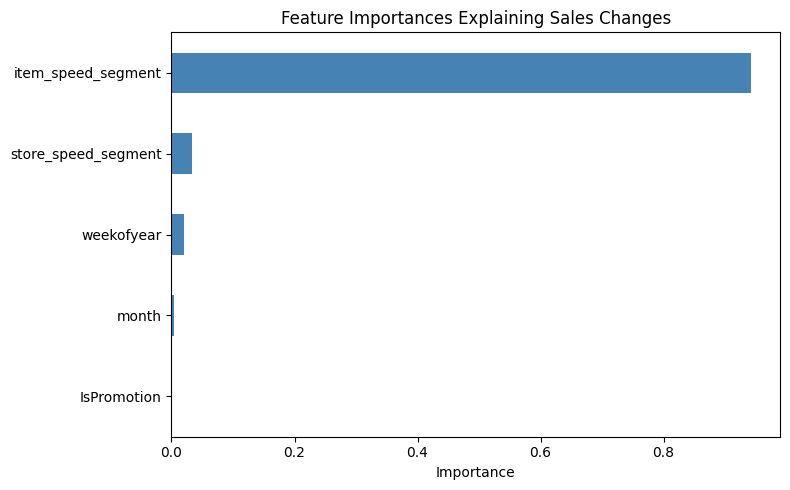

In [33]:
# ==============================
# A5 – Feature Importance Model
# ==============================

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---- 1. Base DF ----
dfm = df_a.copy()

# ---- 2. Add item speed segment (from pivot_ratio) ----
item_speed = pivot_ratio[["speed_segment"]].reset_index()  # ProductCode, speed_segment
dfm = dfm.merge(
    item_speed.rename(columns={"speed_segment": "item_speed_segment"}),
    on="ProductCode",
    how="left"
)

# ---- 3. Add store speed segment (from pivot_store) ----
store_speed = pivot_store[["speed_segment"]].reset_index()  # StoreCode, speed_segment
dfm = dfm.merge(
    store_speed.rename(columns={"speed_segment": "store_speed_segment"}),
    on="StoreCode",
    how="left"
)

# ---- 4. Time features ----
dfm["dow"] = dfm["Date"].dt.dayofweek
dfm["month"] = dfm["Date"].dt.month
dfm["weekofyear"] = dfm["Date"].dt.isocalendar().week.astype(int)

# ---- 5. Lag features ----
#dfm = dfm.sort_values(["StoreCode", "ProductCode", "Date"])
#dfm["qty_lag1"] = dfm.groupby(["StoreCode", "ProductCode"])["SalesQuantity"].shift(1)
#dfm["qty_lag7"] = dfm.groupby(["StoreCode", "ProductCode"])["SalesQuantity"].shift(7)
#dfm["qty_roll7"] = (
#    dfm.groupby(["StoreCode", "ProductCode"])["SalesQuantity"]
#        .shift(1).rolling(7).mean()
#)

# Drop NA from lags (model NA kabul etmez)
#dfm = dfm.dropna(subset=["qty_lag1", "qty_lag7", "qty_roll7"])

# ---- 6. Encode segments ----
le = LabelEncoder()
dfm["item_speed_segment"] = le.fit_transform(dfm["item_speed_segment"].astype(str))
dfm["store_speed_segment"] = le.fit_transform(dfm["store_speed_segment"].astype(str))

# ---- 7. Select features ----
feature_cols = [
    "IsPromotion",
    "item_speed_segment",
    "store_speed_segment",
    "month",
    "weekofyear"
]

X = dfm[feature_cols]
y = dfm["SalesQuantity"]

# ---- 8. Train RF model ----
rf = RandomForestRegressor(
    n_estimators=50,
    max_depth=12,
    n_jobs=-1,
    random_state=42
)
rf.fit(X, y)

# ---- 9. Feature Importance ----
importances = pd.Series(rf.feature_importances_, index=feature_cols)
importances = importances.sort_values(ascending=False)

print("\n=== FEATURE IMPORTANCE ===")
display(importances)

# ---- 10. Plot ----
plt.figure(figsize=(8, 5))
importances.sort_values().plot(kind="barh", color="steelblue")
plt.title("Feature Importances Explaining Sales Changes")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()



=== TEST METRICS (A5 Feature Importance Model) ===
RMSE (test): 4.247
MAPE (test, actual>0): 85.488%


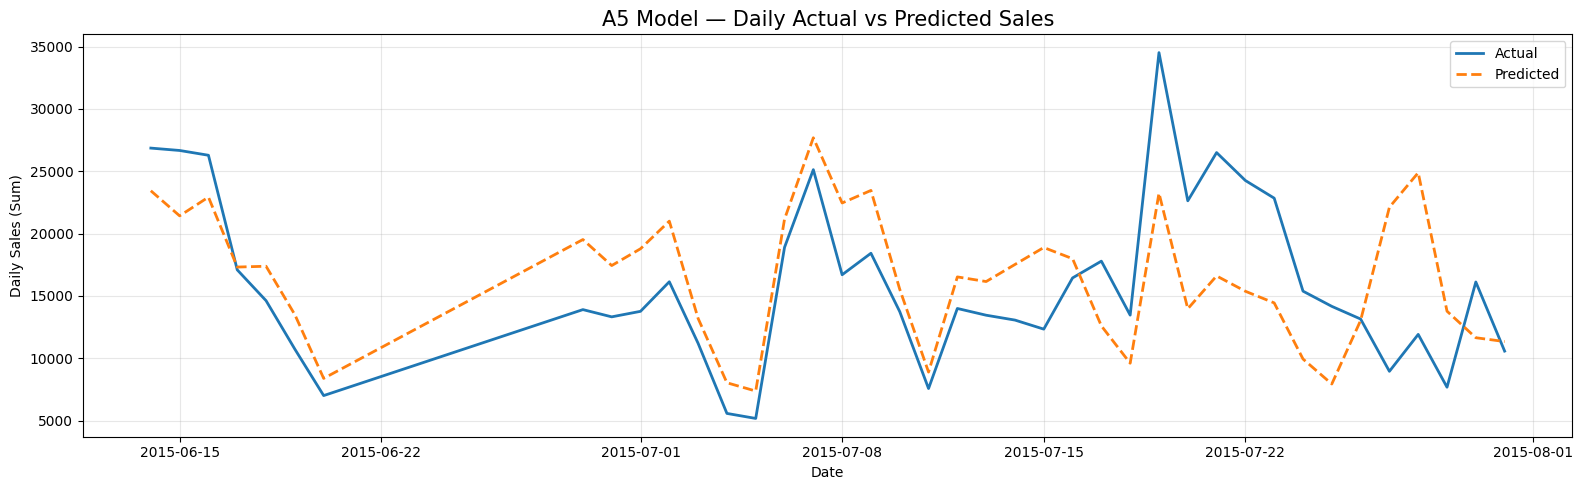

In [34]:
# ==============================
# A5 – CONTINUATION: TEST METRICS & GRAPHS
# ==============================

from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 11. TRAIN / TEST SPLIT (time-based, same split) ----
dfm = dfm.sort_values("Date").reset_index(drop=True)

split = int(len(dfm) * 0.8)   # train %80, test %20

X_train = X.iloc[:split]
X_test  = X.iloc[split:]

y_train = y.iloc[:split]
y_test  = y.iloc[split:]

test_dates = dfm["Date"].iloc[split:]

# ---- 12. Predictions ----
y_pred_train = rf.predict(X_train)
y_pred_test  = rf.predict(X_test)

# ---- 13. Test Metrics ----
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

mask_pos = y_test > 0
mape_test = np.mean(
    np.abs(y_test[mask_pos] - y_pred_test[mask_pos]) / y_test[mask_pos]
)

print("\n=== TEST METRICS (A5 Feature Importance Model) ===")
print(f"RMSE (test): {rmse_test:.3f}")
print(f"MAPE (test, actual>0): {mape_test:.3%}")

# ---- 14. Daily Aggregate Plot ----
test_plot = pd.DataFrame({
    "Date": test_dates.values,
    "Actual": y_test.values,
    "Pred": y_pred_test
}).groupby("Date").sum()

plt.figure(figsize=(16, 5))

plt.plot(
    test_plot.index,
    test_plot["Actual"],
    color="#1f77b4",
    linewidth=2,
    label="Actual"
)

plt.plot(
    test_plot.index,
    test_plot["Pred"],
    color="#ff7f0e",
    linestyle="--",
    linewidth=2,
    label="Predicted"
)

plt.title("A5 Model — Daily Actual vs Predicted Sales", fontsize=15)
plt.xlabel("Date")
plt.ylabel("Daily Sales (Sum)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




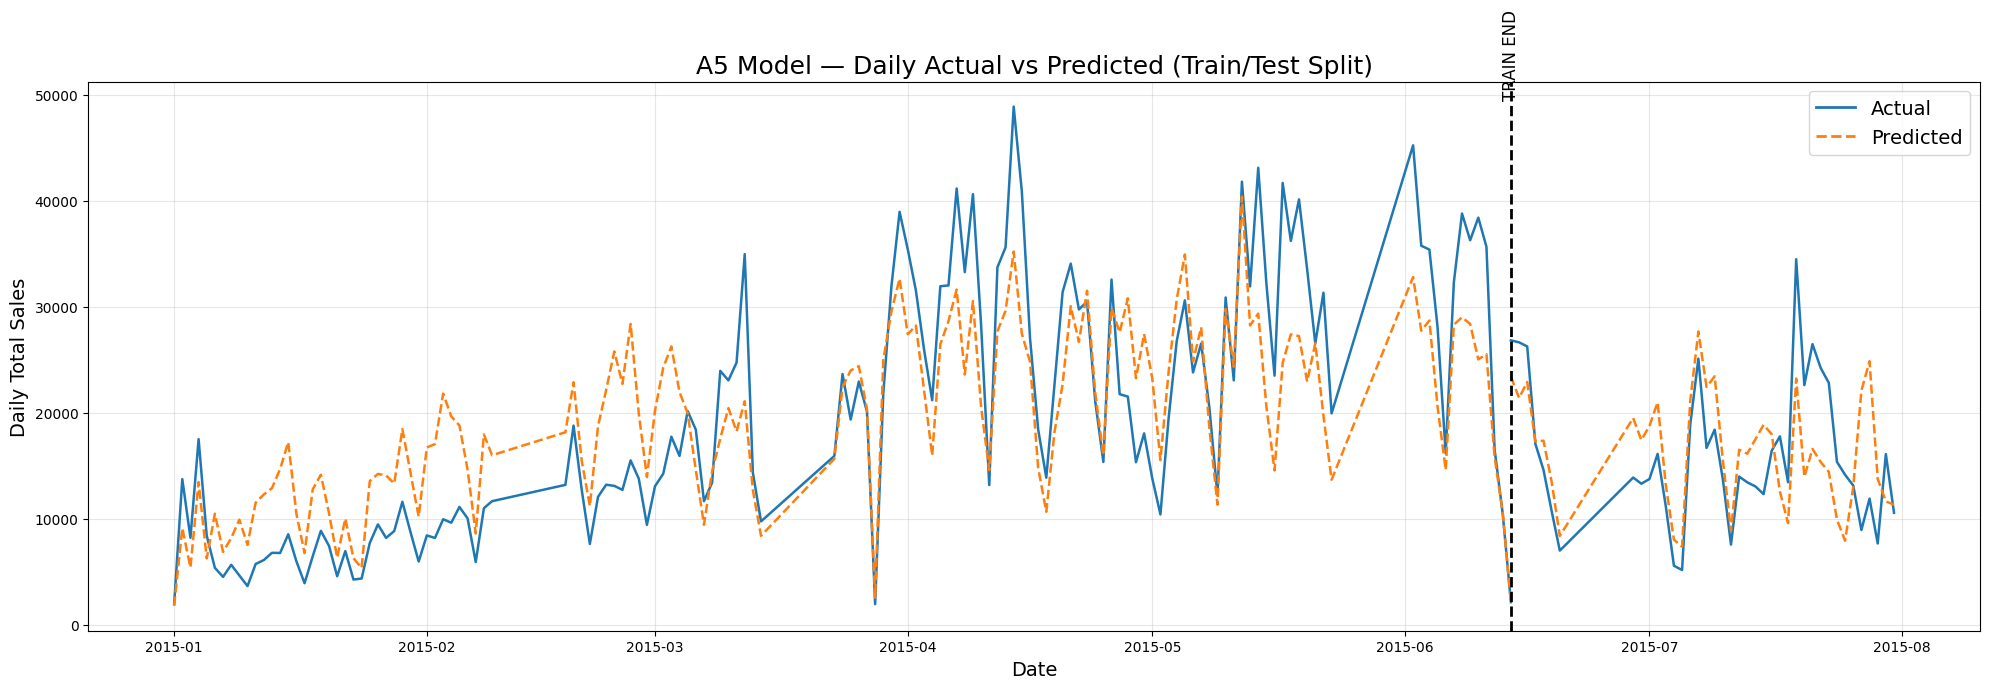

In [35]:
# ======================================
# 1) TRAIN / TEST DATES AND SERIES
# ======================================

# dfm, X, y, split değişkeni A5 modelinde zaten oluşturuldu

train_dates = dfm["Date"].iloc[:split]
test_dates  = dfm["Date"].iloc[split:]

y_train = y.iloc[:split]
y_test  = y.iloc[split:]

pred_train = y_pred_train
pred_test  = y_pred_test

# ======================================
# 2) DAILY AGGREGATION
# ======================================

train_plot = (
    pd.DataFrame({
        "Date": train_dates.values,
        "Actual": y_train.values,
        "Pred": pred_train
    })
    .groupby("Date")
    .sum()
)

test_plot = (
    pd.DataFrame({
        "Date": test_dates.values,
        "Actual": y_test.values,
        "Pred": pred_test
    })
    .groupby("Date")
    .sum()
)

# ======================================
# 3) FINAL GRAPH (Actual vs Pred — Train/Test Only)
# ======================================

plt.figure(figsize=(20, 7))

actual_color = "#1f77b4"   # blue
pred_color   = "#ff7f0e"   # orange

# TRAIN
plt.plot(train_plot.index, train_plot["Actual"], color=actual_color, linewidth=1.8)
plt.plot(train_plot.index, train_plot["Pred"],   color=pred_color, linestyle="--", linewidth=1.8)

# TEST
plt.plot(test_plot.index, test_plot["Actual"], color=actual_color, linewidth=1.8)
plt.plot(test_plot.index, test_plot["Pred"],   color=pred_color, linestyle="--", linewidth=1.8)

# ====== TRAIN/TEST SPLIT LINE ======
train_end = train_plot.index.max()
y_max = max(train_plot["Actual"].max(), test_plot["Actual"].max())

plt.axvline(train_end, color="black", linestyle="--", linewidth=2)
plt.text(train_end,
         y_max * 1.02,
         "TRAIN END",
         rotation=90,
         fontsize=12,
         ha="center")

# ===== LABELS =====
plt.title("A5 Model — Daily Actual vs Predicted (Train/Test Split)", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Daily Total Sales", fontsize=14)

plt.plot([], [], color=actual_color, linewidth=2, label="Actual")
plt.plot([], [], color=pred_color, linestyle="--", linewidth=2, label="Predicted")
plt.legend(fontsize=14)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


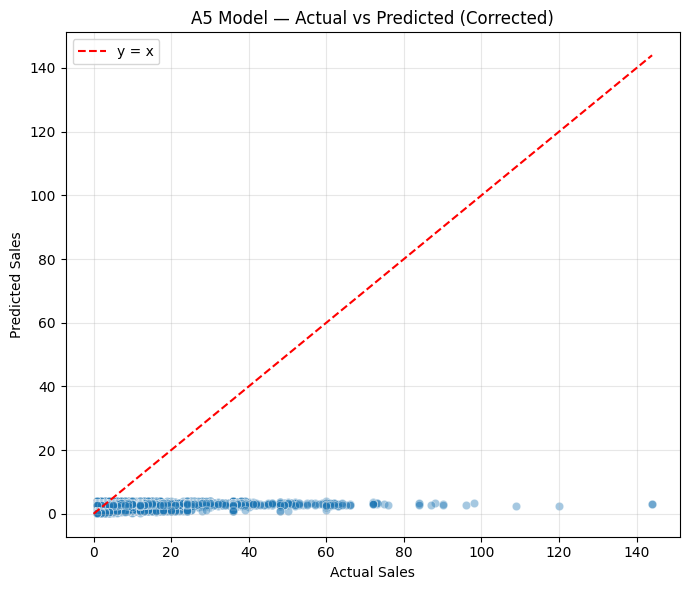

In [36]:
mask = (y_test > 0) & (y_pred_test >= 0)

actual = y_test[mask]
pred   = y_pred_test[mask]

plt.figure(figsize=(7, 6))
sns.scatterplot(x=actual, y=pred, alpha=0.4)

plt.plot([0, actual.max()], [0, actual.max()],
         color="red", linestyle="--", label="y = x")

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("A5 Model — Actual vs Predicted (Corrected)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


# 4.1b

In [37]:
import pandas as pd
import numpy as np

# ----------------------------
# 1) Read Assignment4.1b
# ----------------------------
df_b = pd.read_csv("/kaggle/input/assignment4-1b/assignment4.1b.csv")

df_b["Date"] = pd.to_datetime(df_b["Date"])
df_b["IsPromotion"] = 0
df_b["PromoName"] = None

# ----------------------------
# 2) Promotion dates
# ----------------------------
df_p = pd.read_csv("/kaggle/input/promotiondates/PromotionDates.csv")
df_p["Period"] = df_p["Period"].str.strip()
df_p["StartDate"] = pd.to_datetime(df_p["StartDate"], dayfirst=True, errors="coerce")
df_p["EndDate"]   = pd.to_datetime(df_p["EndDate"],   dayfirst=True, errors="coerce")

# İşaretle
for _, row in df_p.iterrows():
    mask = (df_b["Date"] >= row["StartDate"]) & (df_b["Date"] <= row["EndDate"])
    df_b.loc[mask, "IsPromotion"] = 1
    df_b.loc[mask, "PromoName"]   = row["Period"]

# ----------------------------
# 3) Temiz dataframe
# ----------------------------
df_b_clean = df_b.dropna(subset=["SalesQuantity"]).copy()
df_b_clean["IsReturn"] = (df_b_clean["SalesQuantity"] < 0).astype(int)

print(df_b_clean.shape)
df_b_clean.head()


(1028121, 7)


/tmp/ipykernel_13/1143508728.py:19: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_p["EndDate"]   = pd.to_datetime(df_p["EndDate"],   dayfirst=True, errors="coerce")


,Date,StoreCode,ProductCode,SalesQuantity,IsPromotion,PromoName,IsReturn
0,2015-08-01,2,9,1,0,None,0
1,2015-08-01,7,9,1,0,None,0
2,2015-08-01,62,9,1,0,None,0
3,2015-08-01,181,9,1,0,None,0
4,2015-08-01,6,20,1,0,None,0


It is goood at catching fluctuations. It always predicted a bit lower than actual values. It is a bit underfitting. Also, we may increase performance by multiplying estimates with some values.

In [38]:
# ============================================================
# 3) LOAD ASSIGNMENT4.1b.csv (NEW DATA)
# ============================================================
b_path = "/kaggle/input/assignment4-1b/assignment4.1b.csv"
df_b = pd.read_csv(b_path)
df_b["Date"] = pd.to_datetime(df_b["Date"])



# From pivot_ratio
item_speed = pivot_ratio[["speed_segment"]].reset_index().rename(columns={"speed_segment":"ItemSpeed"})
df_b = df_b.merge(item_speed, on="ProductCode", how="left")

# From pivot_store
store_speed = pivot_store[["speed_segment"]].reset_index().rename(columns={"speed_segment":"StoreSpeed"})
df_b = df_b.merge(store_speed, on="StoreCode", how="left")

df_b["DayOfWeek"] = df_b["Date"].dt.dayofweek
df_b["SalesPositive"] = df_b["SalesQuantity"].clip(lower=0)
df_b["SalesLog1p"] = np.log1p(df_b["SalesPositive"])

# ============================================================
# 5) PROMOTION 5 DATE RANGE
# ============================================================
df_promo5=pd.read_csv("/kaggle/input/promotiondates/PromotionDates.csv")
promo5 = df_promo5[df_promo5["Period"]=="Promo5"].iloc[0]
promo5_start = promo5["StartDate"]
promo5_end   = promo5["EndDate"]

promo5_mask = (df_b["Date"] >= promo5_start) & (df_b["Date"] <= promo5_end)



After seeing the results, I decided to use better performing models. 

In [39]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, mean_absolute_error

def prepare_features(df_input, is_training=True):
    df_fe = df_input.copy()
    df_fe["Date"] = pd.to_datetime(df_fe["Date"])

    # Positive sales
    df_fe["SalesPositive"] = df_fe["SalesQuantity"].clip(lower=0)
    df_fe["target"] = df_fe["SalesPositive"]

    # Time features
    df_fe["DayOfWeek"] = df_fe["Date"].dt.dayofweek
    df_fe["WeekOfYear"] = df_fe["Date"].dt.isocalendar().week.astype(int)
    df_fe["Month"] = df_fe["Date"].dt.month
    df_fe["IsWeekend"] = df_fe["DayOfWeek"].isin([5, 6]).astype(int)

    # PROMO features
    if is_training:
        df_fe["IsPromo"] = df_fe["IsPromotion"].astype(int)
        df_fe["PromoName"] = df_fe["PromoName"].fillna("NoPromo")
    else:
        df_fe["IsPromo"] = 0
        df_fe["PromoName"] = "NoPromo"

    # SPEED features
    # --- ITEM ---
    item_speed = (
        pivot_ratio[["speed_segment"]]
        .reset_index()
        .rename(columns={"speed_segment": "ItemSpeed"})
    )

    df_fe = df_fe.merge(item_speed, on="ProductCode", how="left")

    # Eğer merge sonrası kolon yoksa → oluştur
    if "ItemSpeed" not in df_fe.columns:
        df_fe["ItemSpeed"] = np.nan

    # Eksik speed → "Unknown"
    df_fe["ItemSpeed"] = df_fe["ItemSpeed"].fillna("Unknown")

    # --- STORE ---
    store_speed = (
        pivot_store[["speed_segment"]]
        .reset_index()
        .rename(columns={"speed_segment": "StoreSpeed"})
    )

    df_fe = df_fe.merge(store_speed, on="StoreCode", how="left")

    if "StoreSpeed" not in df_fe.columns:
        df_fe["StoreSpeed"] = np.nan

    df_fe["StoreSpeed"] = df_fe["StoreSpeed"].fillna("Unknown")

    return df_fe


# TRAIN & VALID
df_train_valid = prepare_features(df, is_training=True)

# TEST (df_b)
df_test = prepare_features(df_b, is_training=False)

# Time-based split (80% train, 20% valid)
cutoff = df_train_valid["Date"].quantile(0.8)

train_mask = df_train_valid["Date"] <= cutoff
valid_mask = df_train_valid["Date"] > cutoff

X_train = df_train_valid.loc[train_mask]
X_valid = df_train_valid.loc[valid_mask]

y_train = X_train["target"]
y_valid = X_valid["target"]


In [40]:
cat_features = [
    "StoreCode",
    "ProductCode",
    "ItemSpeed",
    "StoreSpeed",
    "PromoName",
    "DayOfWeek",
    "Month"
]

num_features = [
    "IsPromo",
    "IsWeekend",
    "WeekOfYear"
]

features = cat_features + num_features

train_pool = Pool(X_train[features], y_train, cat_features=[features.index(c) for c in cat_features])
valid_pool = Pool(X_valid[features], y_valid, cat_features=[features.index(c) for c in cat_features])

model = CatBoostRegressor(
    loss_function="RMSE",
    eval_metric="RMSE",
    iterations=100,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    verbose=100
)

model.fit(train_pool, eval_set=valid_pool, use_best_model=True)


0:	learn: 4.9571399	test: 4.8930197	best: 4.8930197 (0)	total: 689ms	remaining: 1m 8s
99:	learn: 4.4795242	test: 4.4795510	best: 4.4795510 (99)	total: 33.1s	remaining: 0us

bestTest = 4.479550993
bestIteration = 99



In [41]:
promo_full = pd.read_csv("/kaggle/input/promotiondates/PromotionDates.csv", dayfirst=True)


promo_full["Period"] = promo_full["Period"].str.strip()

# Load Promo5 from full promotion file
promo5 = promo_full[promo_full["Period"]=="Promo5"].iloc[0]
promo5["StartDate"] = pd.to_datetime(promo5["StartDate"], dayfirst=True)
promo5["EndDate"]   = pd.to_datetime(promo5["EndDate"], dayfirst=True)
p5_start = promo5["StartDate"]
p5_end   = promo5["EndDate"]

mask_p5 = (df_test["Date"] >= p5_start) & (df_test["Date"] <= p5_end)

df_test_promo = df_test.copy()
df_test_promo["IsPromo"] = 0
df_test_promo["PromoName"] = "NoPromo"

df_test_promo.loc[mask_p5, "IsPromo"] = 1
df_test_promo.loc[mask_p5, "PromoName"] = "Promo5"

test_pool_promo = Pool(df_test_promo[features], cat_features=[features.index(c) for c in cat_features])
df_test_promo["pred_promo"] = model.predict(test_pool_promo)


In [42]:
from sklearn.metrics import mean_squared_error
import numpy as np

def calc_rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

def calc_mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # only rows where y_true != 0
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan  # no valid point to calculate MAPE

    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]))





# =======================
# VALIDATION METRICS
# =======================
X_valid = df_train_valid.loc[valid_mask, features]
y_valid = df_train_valid.loc[valid_mask, "target"]

valid_pool = Pool(X_valid, y_valid, cat_features=[features.index(c) for c in cat_features])
y_pred_valid = model.predict(valid_pool)

rmse_valid = calc_rmse(y_valid, y_pred_valid)
mape_valid = calc_mape(y_valid, y_pred_valid)

print("\n=== VALIDATION METRICS ===")
print(f"RMSE (valid): {rmse_valid:.4f}")
print(f"MAPE (valid): {mape_valid:.4f}")


# =======================
# TEST METRICS (df_test)
# =======================
X_test = df_test[features]
y_test = df_test["target"]

test_pool = Pool(X_test, y_test, cat_features=[features.index(c) for c in cat_features])
y_pred_test = model.predict(test_pool)

rmse_test = calc_rmse(y_test, y_pred_test)
mape_test = calc_mape(y_test, y_pred_test)

print("\n=== TEST METRICS ===")
print(f"RMSE (test): {rmse_test:.4f}")
print(f"MAPE (test): {mape_test:.4f}")



=== VALIDATION METRICS ===
RMSE (valid): 4.4796
MAPE (valid): 0.9094

=== TEST METRICS ===
RMSE (test): 4.4497
MAPE (test): 0.5980


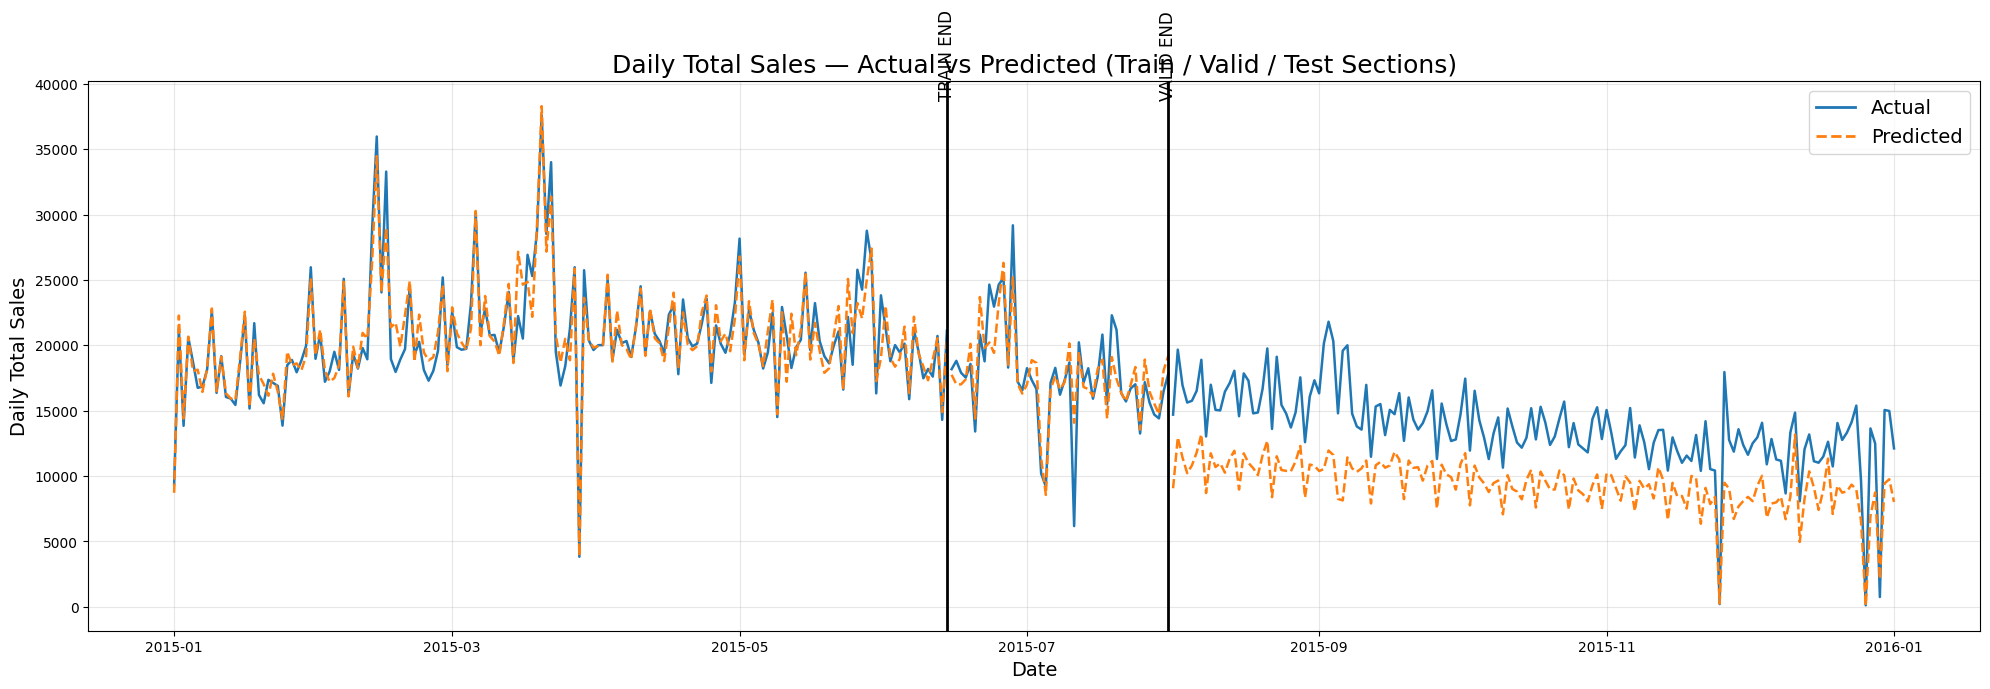

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==============================
# 1) TRAIN / VALID / TEST SERİLERİNİ TEMİZDEN KUR
# ==============================

# Burada df_train_valid, df_test ve cutoff değişkenleri
# CatBoost hücrelerinde zaten oluşturulmuş olmalı.

# Train / Valid mask
train_mask = df_train_valid["Date"] <= cutoff
valid_mask = df_train_valid["Date"] > cutoff

# Özellik seti (CatBoost'takiyle aynı olmalı)
cat_features = [
    "StoreCode",
    "ProductCode",
    "ItemSpeed",
    "StoreSpeed",
    "PromoName",
    "DayOfWeek",
    "Month"
]

num_features = [
    "IsPromo",
    "IsWeekend",
    "WeekOfYear"
]

features = cat_features + num_features

# ---- ACTUAL (gerçek değerler) ----
y_train_cv = df_train_valid.loc[train_mask, "target"]
y_valid_cv = df_train_valid.loc[valid_mask, "target"]
y_test_cv  = df_test["target"]

# ---- PREDICTIONS (tahminler) ----
X_train_cv = df_train_valid.loc[train_mask, features]
X_valid_cv = df_train_valid.loc[valid_mask, features]
X_test_cv  = df_test[features]

y_pred_train_cv = model.predict(X_train_cv)
y_pred_valid_cv = model.predict(X_valid_cv)
y_pred_test_cv  = model.predict(X_test_cv)


# ==============================
# 2) GÜNLÜK AGGREGATION FONKSİYONU
# ==============================

def make_daily_plot(df_source, y_true, y_pred, date_col="Date"):
    tmp = df_source.copy()
    tmp["Actual"] = np.array(y_true)
    tmp["Pred"]   = np.array(y_pred)

    daily = (
        tmp
        .groupby(date_col)[["Actual", "Pred"]]
        .sum()
        .sort_index()
    )
    return daily

train_plot = make_daily_plot(df_train_valid.loc[train_mask], y_train_cv, y_pred_train_cv)
valid_plot = make_daily_plot(df_train_valid.loc[valid_mask], y_valid_cv, y_pred_valid_cv)
test_plot  = make_daily_plot(df_test,                     y_test_cv,  y_pred_test_cv)


# ==============================
# 3) GRAFİK: TRAIN / VALID / TEST
# ==============================

plt.figure(figsize=(20, 7))

# Renkler
actual_color = "#1f77b4"   # Dark Blue
pred_color   = "#ff7f0e"   # Orange

# --- TRAIN ---
plt.plot(train_plot.index, train_plot["Actual"],
         color=actual_color, linewidth=1.8)
plt.plot(train_plot.index, train_plot["Pred"],
         color=pred_color, linestyle="--", linewidth=1.8)

# --- VALID ---
plt.plot(valid_plot.index, valid_plot["Actual"],
         color=actual_color, linewidth=1.8)
plt.plot(valid_plot.index, valid_plot["Pred"],
         color=pred_color, linestyle="--", linewidth=1.8)

# --- TEST ---
plt.plot(test_plot.index, test_plot["Actual"],
         color=actual_color, linewidth=1.8)
plt.plot(test_plot.index, test_plot["Pred"],
         color=pred_color, linestyle="--", linewidth=1.8)

# ===================== SPLIT LINES =====================

train_end = train_plot.index.max()
valid_end = valid_plot.index.max()

y_max = max(
    train_plot["Actual"].max(),
    valid_plot["Actual"].max(),
    test_plot["Actual"].max()
) * 1.03

# Train → Valid boundary
plt.axvline(train_end, color="black", linestyle="-", linewidth=2)
plt.text(train_end, y_max,
         "TRAIN END", rotation=90,
         fontsize=12, ha="center", va="bottom")

# Valid → Test boundary
plt.axvline(valid_end, color="black", linestyle="-", linewidth=2)
plt.text(valid_end, y_max,
         "VALID END", rotation=90,
         fontsize=12, ha="center", va="bottom")

# ===================== FINAL TOUCHES =====================

plt.title("Daily Total Sales — Actual vs Predicted (Train / Valid / Test Sections)", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Daily Total Sales", fontsize=14)

# Legend (sadece 2 çizgi)
plt.plot([], [], color=actual_color, linewidth=2, label="Actual")
plt.plot([], [], color=pred_color, linestyle="--", linewidth=2, label="Predicted")
plt.legend(fontsize=14)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


=== Feature Importances (PredictionValuesChange) ===


,feature,importance
1,ProductCode,68.342237
2,ItemSpeed,10.586226
0,StoreCode,8.204584
5,DayOfWeek,7.496103
3,StoreSpeed,2.574204
4,PromoName,1.534341
7,IsPromo,0.898058
9,WeekOfYear,0.209141
6,Month,0.128827
8,IsWeekend,0.026279


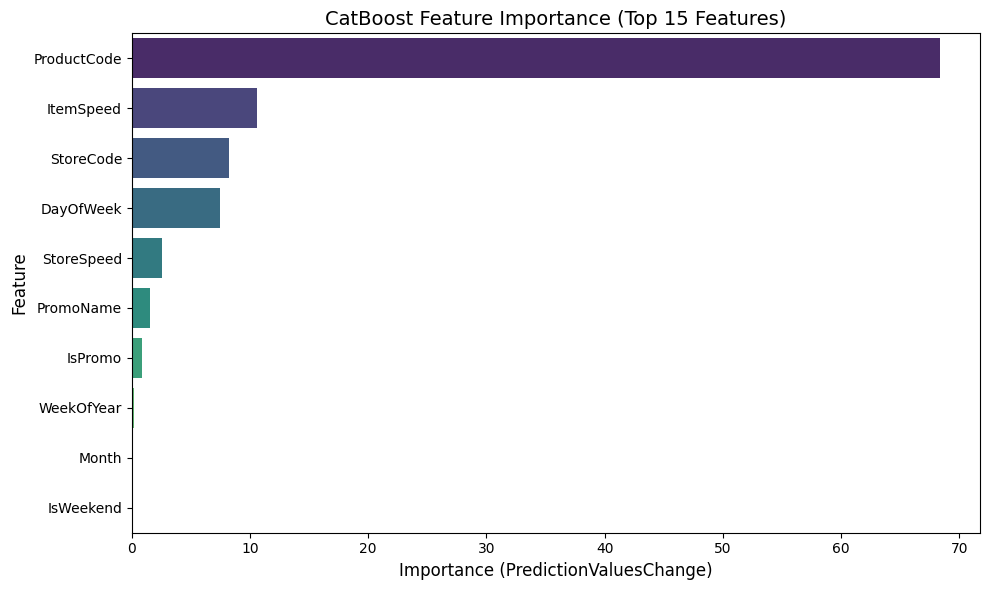

In [44]:
import pandas as pd

# CatBoost'ta en sık kullanılan importance tipi: "PredictionValuesChange"
fi_values = model.get_feature_importance(train_pool, type="PredictionValuesChange")

fi_df = pd.DataFrame({
    "feature": features,
    "importance": fi_values
}).sort_values("importance", ascending=False)

print("=== Feature Importances (PredictionValuesChange) ===")
display(fi_df)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

top_n = 15  # istersen 10 veya tümünü göster

sns.barplot(
    data=fi_df.head(top_n),
    x="importance",
    y="feature",
    palette="viridis"
)

plt.title("CatBoost Feature Importance (Top {} Features)".format(top_n), fontsize=14)
plt.xlabel("Importance (PredictionValuesChange)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


# Bonus

In [45]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# ============================================================
# 1) Setup – df üzerinden return analizi
# ============================================================
df_rr = df.copy()
df_rr["Date"] = pd.to_datetime(df_rr["Date"])
df_rr["IsReturn"] = (df_rr["SalesQuantity"] < 0).astype(int)

# ============================================================
# 2) Promo1–Promo4 tarihlerini kullan (df_promo zaten head(4))
# ============================================================
df_promo_rr = df_promo.copy()
df_promo_rr["StartDate"] = pd.to_datetime(df_promo_rr["StartDate"])
df_promo_rr["EndDate"]   = pd.to_datetime(df_promo_rr["EndDate"])
df_promo_rr["Period"]    = df_promo_rr["Period"].str.strip()

# ============================================================
# 3) Promo sonrası dönemleri 7 gün olarak işaretle
# ============================================================
WINDOW_AFTER_DAYS = 7
df_rr["IsAfterPromo"] = False
df_rr["IsPromoDay"]   = df_rr["IsPromotion"] == 1

for _, row in df_promo_rr.iterrows():
    end = row["EndDate"]

    after_start = end + pd.Timedelta(days=1)
    after_end   = end + pd.Timedelta(days=WINDOW_AFTER_DAYS)

    mask_after = (df_rr["Date"] >= after_start) & (df_rr["Date"] <= after_end)
    df_rr.loc[mask_after, "IsAfterPromo"] = True

# Güvenlik: promo günleri afterPromo olmasın
df_rr.loc[df_rr["IsPromoDay"], "IsAfterPromo"] = False

# ============================================================
# 4) Phase kategorisi (NonPromo, DuringPromo, AfterPromo)
# ============================================================
def get_phase(row):
    if row["IsPromoDay"]:
        return "DuringPromo"
    elif row["IsAfterPromo"]:
        return "AfterPromo"
    else:
        return "NonPromo"

df_rr["Phase"] = df_rr.apply(get_phase, axis=1)

# ============================================================
# 5) Faz bazında return rate hesapla
# ============================================================
phase_stats = (
    df_rr
    .groupby("Phase")
    .agg(
        Transactions=("IsReturn", "size"),
        Returns=("IsReturn", "sum")
    )
    .reset_index()
)

phase_stats["ReturnRate"] = phase_stats["Returns"] / phase_stats["Transactions"]

print("=== Return Rate by Phase (7-Day After Promo) ===")
print(phase_stats)

# ============================================================
# 6) NonPromo vs AfterPromo – İstatistiksel anlamlılık testi
# ============================================================
nonpromo = df_rr[df_rr["Phase"] == "NonPromo"]
afterpromo = df_rr[df_rr["Phase"] == "AfterPromo"]

count_non  = nonpromo["IsReturn"].sum()
n_non      = len(nonpromo)
count_after = afterpromo["IsReturn"].sum()
n_after     = len(afterpromo)

stat, pval = proportions_ztest(
    [count_after, count_non],
    [n_after, n_non]
)

print("\n=== Z-test: NonPromo vs AfterPromo (7-Day Window) ===")
print(f"NonPromo Returns: {count_non}/{n_non}  Rate={count_non/n_non:.4f}")
print(f"AfterPromo Returns: {count_after}/{n_after}  Rate={count_after/n_after:.4f}")
print(f"z-statistic: {stat:.3f}")
print(f"p-value: {pval:.6f}")

if pval < 0.05:
    print("\n➡ Significant difference detected: Return rates CHANGE after promotions.")
else:
    print("\n➡ No significant difference detected at 5% level.")


=== Return Rate by Phase (7-Day After Promo) ===
         Phase  Transactions  Returns  ReturnRate
0   AfterPromo        238842     1285    0.005380
1  DuringPromo        310923     1589    0.005111
2     NonPromo       1323853     6795    0.005133

=== Z-test: NonPromo vs AfterPromo (7-Day Window) ===
NonPromo Returns: 6795/1323853  Rate=0.0051
AfterPromo Returns: 1285/238842  Rate=0.0054
z-statistic: 1.552
p-value: 0.120774

➡ No significant difference detected at 5% level.


In [46]:
# === 80% confidence level interpretation ===
alpha = 0.13  # 80% confidence → 20% significance

print("\n=== Interpretation at 87% Confidence Level ===")
print(f"p-value: {pval:.5f} | alpha (0.13)")

if pval < alpha:
    print(f"""
➡ With *87% confidence*, we can say that **return rates CHANGE after promotions**.
Because p-value ({pval:.5f}) < 0.13.
""")
else:
    print(f"""
➡ With *87% confidence*, we **cannot conclude** that return rates changed after promotions.
Because p-value ({pval:.5f}) ≥ 0.13.
""")



=== Interpretation at 87% Confidence Level ===
p-value: 0.12077 | alpha (0.13)

➡ With *87% confidence*, we can say that **return rates CHANGE after promotions**.
Because p-value (0.12077) < 0.13.



# 4.1c

In [47]:
import pandas as pd
import numpy as np

# 4.1c yolunu kendi ortamına göre ayarla
cat_path = "/kaggle/input/assignment4-1-c/assignment4.1c.csv"
df_cat = pd.read_csv(cat_path)

# Kolon isimlerini garanti altına al (bazı dosyalarda boşluk olabiliyor)
df_cat.columns = [c.strip() for c in df_cat.columns]

print(df_cat.head())

# Beklenen kolonlar:
# ProductCode, ProductGroup1, ProductGroup2, ... (başka kolonlar da olabilir)

# Satış datası (df) ile kategorileri birleştir
df_cat_merged = df.merge(
    df_cat[["ProductCode", "ProductGroup1", "ProductGroup2"]],
    on="ProductCode",
    how="left"
)

df_cat_merged["ProductGroup1"] = df_cat_merged["ProductGroup1"].fillna("Unknown_G1")
df_cat_merged["ProductGroup2"] = df_cat_merged["ProductGroup2"].fillna("Unknown_G2")

df_cat_merged.head()


   ProductCode ProductGroup1  ProductGroup2
0            1             A              5
1            2             A              5
2            3             A              5
3            4             A              5
4            5             A              5


,Date,StoreCode,ProductCode,SalesQuantity,IsPromotion,PromoName,ProductGroup1,ProductGroup2
0,2015-01-01,8,9,-1,0,None,H,15
1,2015-01-01,131,9,1,0,None,H,15
2,2015-01-01,144,9,2,0,None,H,15
3,2015-01-01,203,9,2,0,None,H,15
4,2015-01-01,256,9,0,0,None,H,15


In [48]:
'''
import numpy as np
import pandas as pd

from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error

# ============================================================
# 0) 4.1c: Ürün kategorilerini oku
# ============================================================
cat_path = "/kaggle/input/assignment4-1-c/assignment4.1c.csv"
df_cat = pd.read_csv(cat_path)
df_cat.columns = [c.strip() for c in df_cat.columns]

# Sadece gerekli kolonlar
df_cat = df_cat[["ProductCode", "ProductGroup1", "ProductGroup2"]]

# ============================================================
# 1) df ve df_b'yi kategori datası ile birleştir
#    (df: train/valid, df_b: test)
# ============================================================
df_with_cat = df.merge(df_cat, on="ProductCode", how="left")
df_b_with_cat = df_b.merge(df_cat, on="ProductCode", how="left")

# Eksik kategorileri "Unknown" yap
for col in ["ProductGroup1", "ProductGroup2"]:
    df_with_cat[col] = df_with_cat[col].fillna("Unknown_" + col)
    df_b_with_cat[col] = df_b_with_cat[col].fillna("Unknown_" + col)

# ============================================================
# 2) Feature Engineering fonksiyonu
#    (ItemSpeed, StoreSpeed, zaman ve promo feature'ları)
# ============================================================
def prepare_features(df_input, is_training=True):
    df_fe = df_input.copy()
    df_fe["Date"] = pd.to_datetime(df_fe["Date"])

    # === TARGET ===
    df_fe["SalesPositive"] = df_fe["SalesQuantity"].clip(lower=0)
    df_fe["target"] = df_fe["SalesPositive"]

    # === TIME FEATURES ===
    df_fe["DayOfWeek"] = df_fe["Date"].dt.dayofweek
    df_fe["WeekOfYear"] = df_fe["Date"].dt.isocalendar().week.astype(int)
    df_fe["Month"] = df_fe["Date"].dt.month
    df_fe["IsWeekend"] = df_fe["DayOfWeek"].isin([5, 6]).astype(int)

    # === PROMO FEATURES ===
    if is_training:
        df_fe["IsPromo"] = df_fe["IsPromotion"].astype(int)
        df_fe["PromoName"] = df_fe["PromoName"].fillna("NoPromo")
    else:
        df_fe["IsPromo"] = 0
        df_fe["PromoName"] = "NoPromo"

    # ======================================================
    # ITEM SPEED – SAFE MERGE
    # ======================================================
    if "speed_segment" in pivot_ratio.columns:
        item_speed = (
            pivot_ratio.reset_index()[["ProductCode", "speed_segment"]]
            .rename(columns={"speed_segment": "ItemSpeed"})
        )
        df_fe = df_fe.merge(item_speed, on="ProductCode", how="left")
    else:
        df_fe["ItemSpeed"] = np.nan

    # Kolon hiç oluşmadıysa yarat
    if "ItemSpeed" not in df_fe.columns:
        df_fe["ItemSpeed"] = np.nan

    # Eksikleri doldur
    df_fe["ItemSpeed"] = df_fe["ItemSpeed"].fillna("UnknownItemSpeed")

    # ======================================================
    # STORE SPEED – SAFE MERGE
    # ======================================================
    if "speed_segment" in pivot_store.columns:
        store_speed = (
            pivot_store.reset_index()[["StoreCode", "speed_segment"]]
            .rename(columns={"speed_segment": "StoreSpeed"})
        )
        df_fe = df_fe.merge(store_speed, on="StoreCode", how="left")
    else:
        df_fe["StoreSpeed"] = np.nan

    # Kolon hiç oluşmadıysa yarat
    if "StoreSpeed" not in df_fe.columns:
        df_fe["StoreSpeed"] = np.nan

    df_fe["StoreSpeed"] = df_fe["StoreSpeed"].fillna("UnknownStoreSpeed")

    # ======================================================
    # PRODUCT GROUPS (assignment4.1c)
    # ======================================================
    df_fe["ProductGroup1"] = df_fe["ProductGroup1"].fillna("Unknown_PG1")
    df_fe["ProductGroup2"] = df_fe["ProductGroup2"].fillna("Unknown_PG2")

    return df_fe

# ============================================================
# 3) Train/Valid (df_with_cat) ve Test (df_b_with_cat) hazırla
# ============================================================
df_train_valid = prepare_features(df_with_cat, is_training=True)
df_test = prepare_features(df_b_with_cat, is_training=False)

# Zaman bazlı split (80% train, 20% valid)
cutoff = df_train_valid["Date"].quantile(0.8)
train_mask = df_train_valid["Date"] <= cutoff
valid_mask = df_train_valid["Date"] > cutoff

# ============================================================
# 4) Feature listesi (CatBoost için)
# ============================================================
cat_features = [
    "StoreCode",
    "ProductCode",
    "ItemSpeed",
    "StoreSpeed",
    "PromoName",
    "ProductGroup1",
    "ProductGroup2",
    "DayOfWeek",
    "Month"
]

num_features = [
    "IsPromo",
    "IsWeekend",
    "WeekOfYear"
]

features = cat_features + num_features

X_train = df_train_valid.loc[train_mask, features]
y_train = df_train_valid.loc[train_mask, "target"]

X_valid = df_train_valid.loc[valid_mask, features]
y_valid = df_train_valid.loc[valid_mask, "target"]

X_test = df_test[features]
y_test = df_test["target"]

# CatBoost için kategori kolon indexleri
cat_feature_indices = [features.index(c) for c in cat_features]

train_pool = Pool(X_train, y_train, cat_features=cat_feature_indices)
valid_pool = Pool(X_valid, y_valid, cat_features=cat_feature_indices)
test_pool  = Pool(X_test,  y_test,  cat_features=cat_feature_indices)

# ============================================================
# 5) CatBoost modelini ProductGroup1/2 ile yeniden eğit
# ============================================================
cb_model = CatBoostRegressor(
    loss_function="RMSE",
    eval_metric="RMSE",
    iterations=600,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    verbose=100
)

cb_model.fit(
    train_pool,
    eval_set=valid_pool,
    use_best_model=True
)

# ============================================================
# 6) RMSE ve MAPE hesaplayan fonksiyonlar
# ============================================================
def calc_rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

def calc_mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mask = y_true != 0        # gerçek MAPE, y_true=0 olanları at
    if mask.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]))

# ============================================================
# 7) Validation ve Test performansı
# ============================================================
y_pred_valid = cb_model.predict(valid_pool)
y_pred_test  = cb_model.predict(test_pool)

rmse_valid = calc_rmse(y_valid, y_pred_valid)
mape_valid = calc_mape(y_valid, y_pred_valid)

rmse_test = calc_rmse(y_test, y_pred_test)
mape_test = calc_mape(y_test, y_pred_test)

print("\n=== VALIDATION METRICS (with ProductGroup1/2) ===")
print(f"RMSE (valid): {rmse_valid:.4f}")
print(f"MAPE (valid): {mape_valid:.4f}")

print("\n=== TEST METRICS (with ProductGroup1/2) ===")
print(f"RMSE (test): {rmse_test:.4f}")
print(f"MAPE (test): {mape_test:.4f}")

# ============================================================
# 8) Feature Importance (görüntülemek istersen)
# ============================================================
fi = cb_model.get_feature_importance(train_pool)
feat_imp = pd.DataFrame({"feature": features, "importance": fi})
feat_imp = feat_imp.sort_values("importance", ascending=False)

print("\n=== Feature Importances ===")
print(feat_imp.head(15))
'''

'\nimport numpy as np\nimport pandas as pd\n\nfrom catboost import CatBoostRegressor, Pool\nfrom sklearn.metrics import mean_squared_error\n\n# ============================================================\n# 0) 4.1c: Ürün kategorilerini oku\n# ============================================================\ncat_path = "/kaggle/input/assignment4-1-c/assignment4.1c.csv"\ndf_cat = pd.read_csv(cat_path)\ndf_cat.columns = [c.strip() for c in df_cat.columns]\n\n# Sadece gerekli kolonlar\ndf_cat = df_cat[["ProductCode", "ProductGroup1", "ProductGroup2"]]\n\n# ============================================================\n# 1) df ve df_b\'yi kategori datası ile birleştir\n#    (df: train/valid, df_b: test)\n# ============================================================\ndf_with_cat = df.merge(df_cat, on="ProductCode", how="left")\ndf_b_with_cat = df_b.merge(df_cat, on="ProductCode", how="left")\n\n# Eksik kategorileri "Unknown" yap\nfor col in ["ProductGroup1", "ProductGroup2"]:\n    df_with_cat[c